In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "air_quality.csv"
df = pd.read_csv(path)

#Extract date and hour
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

AQI/PM2.5 along days, each day is a line


Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK)


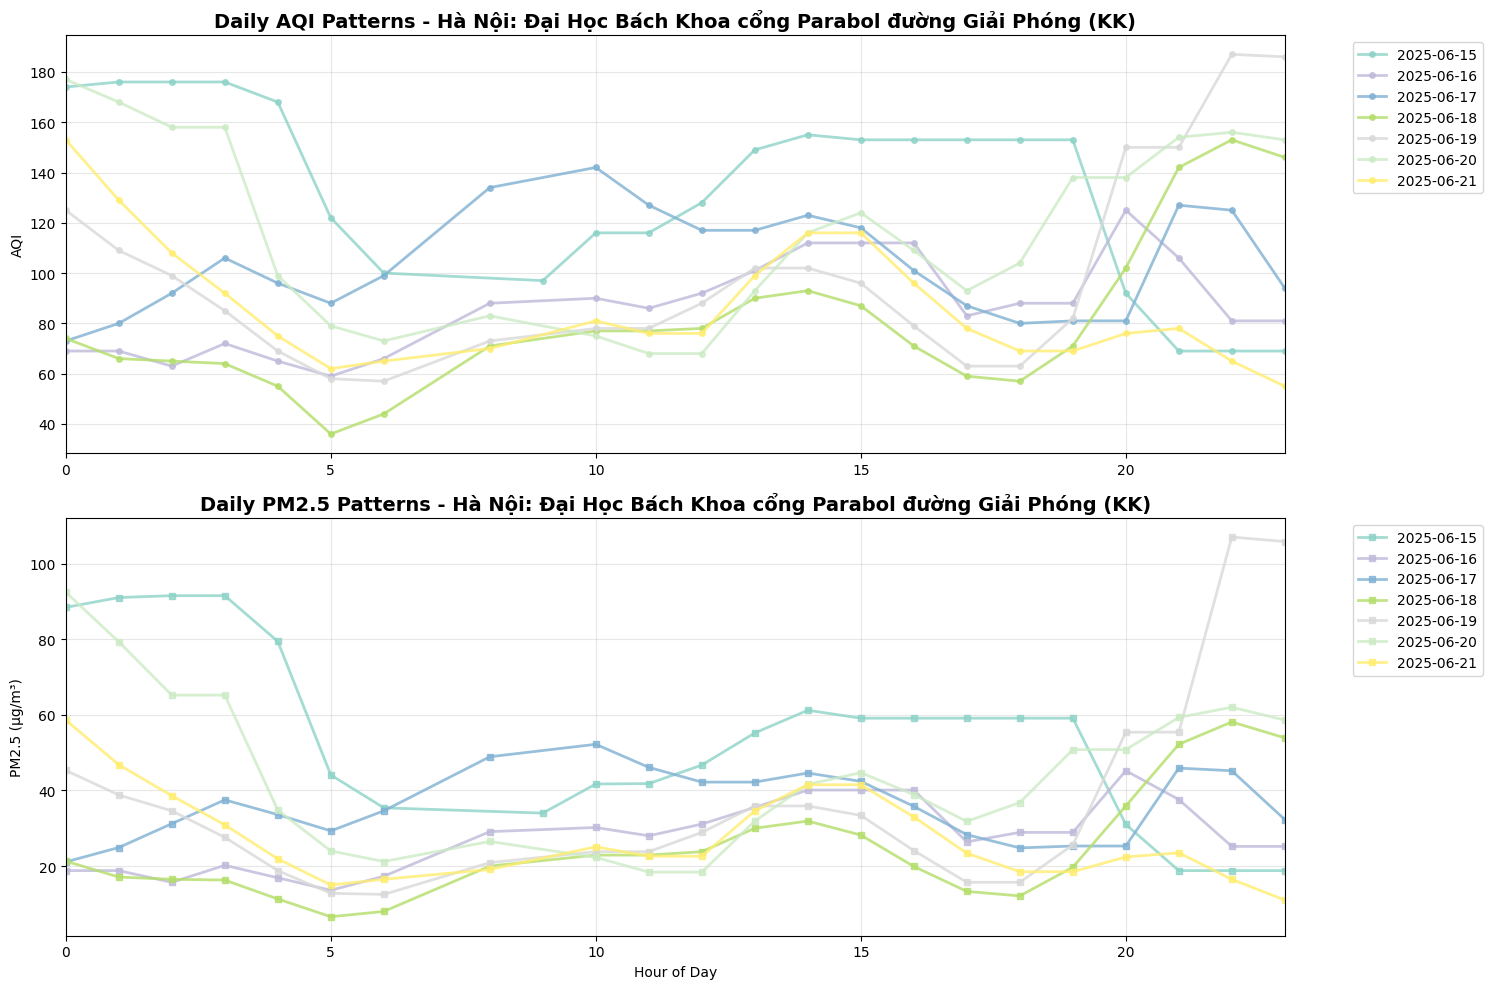


Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK)


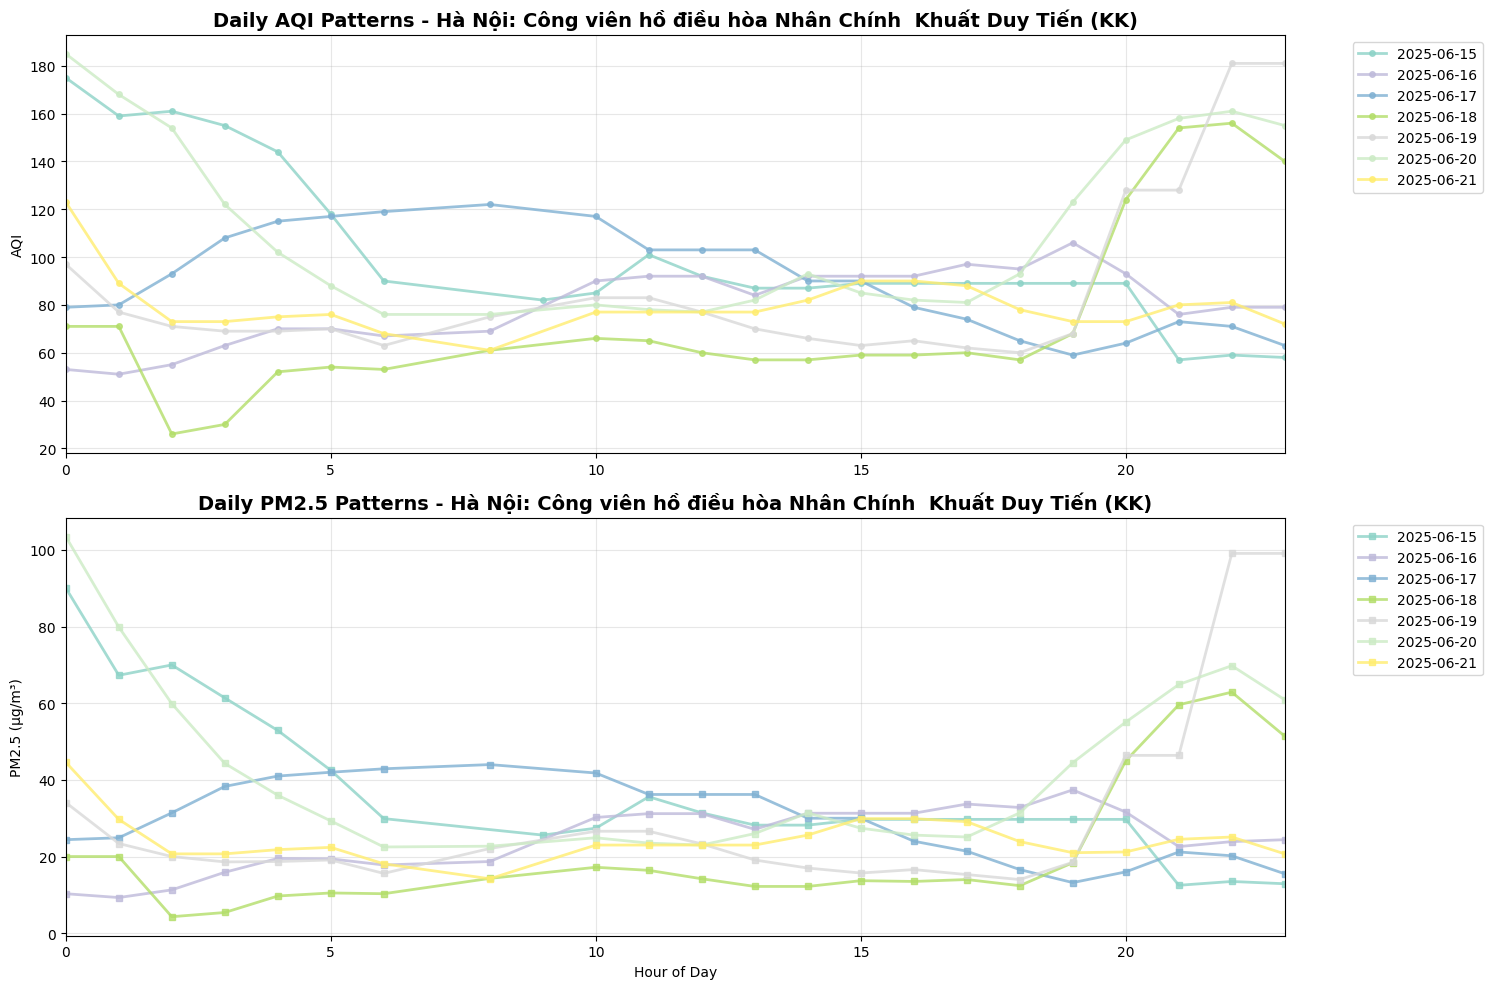


Minh Khai - Bắc Từ Liêm


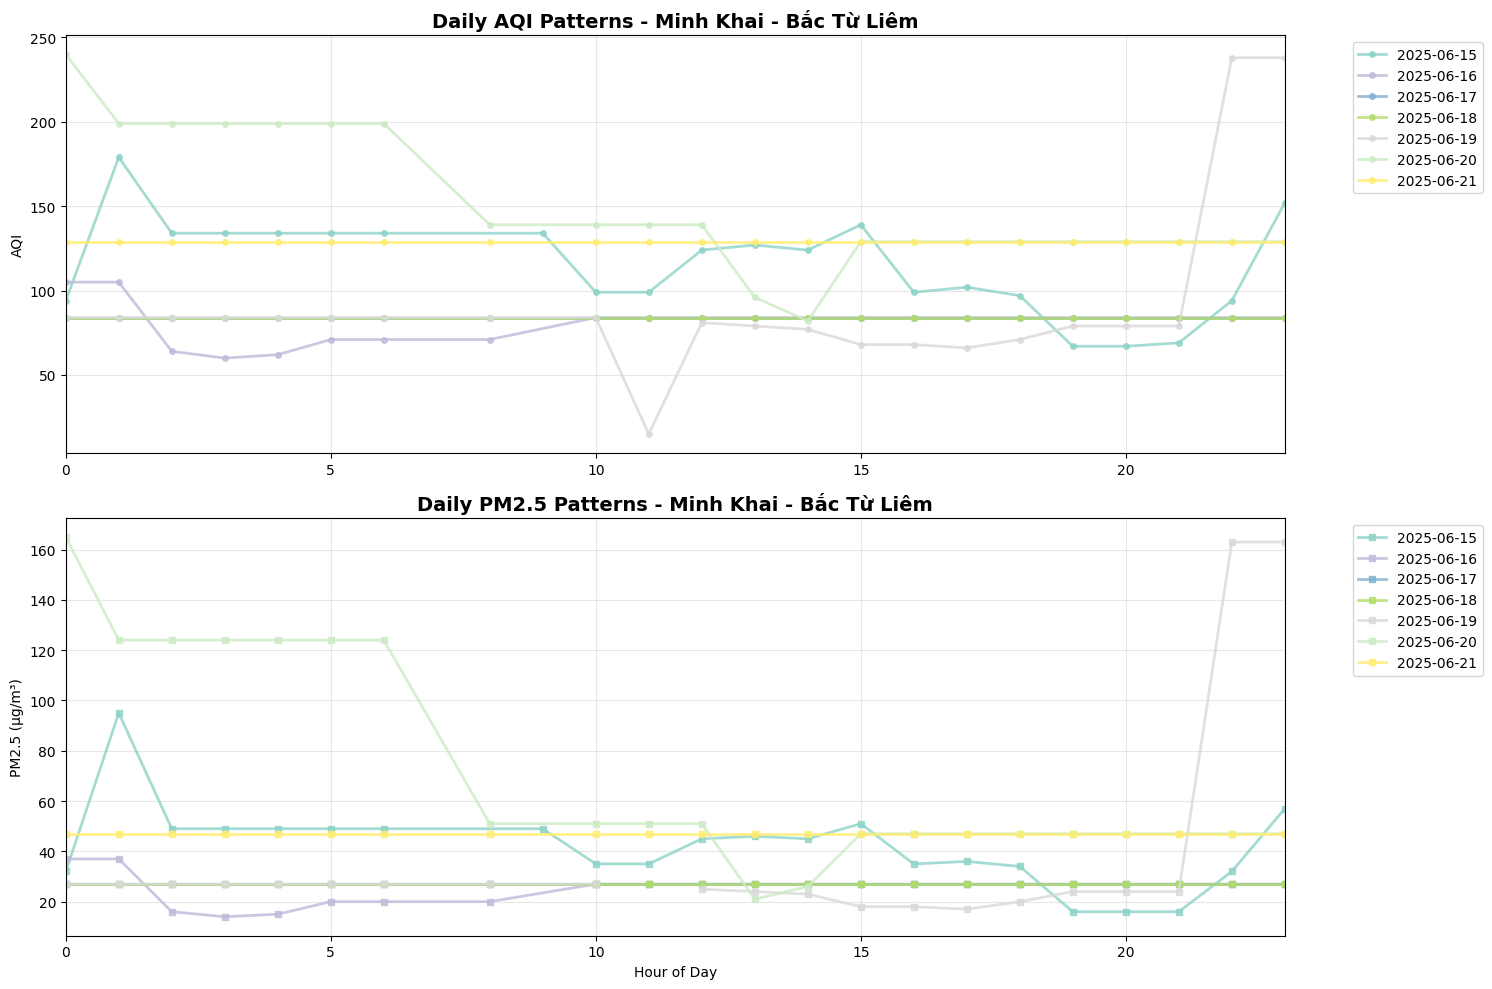


Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK)


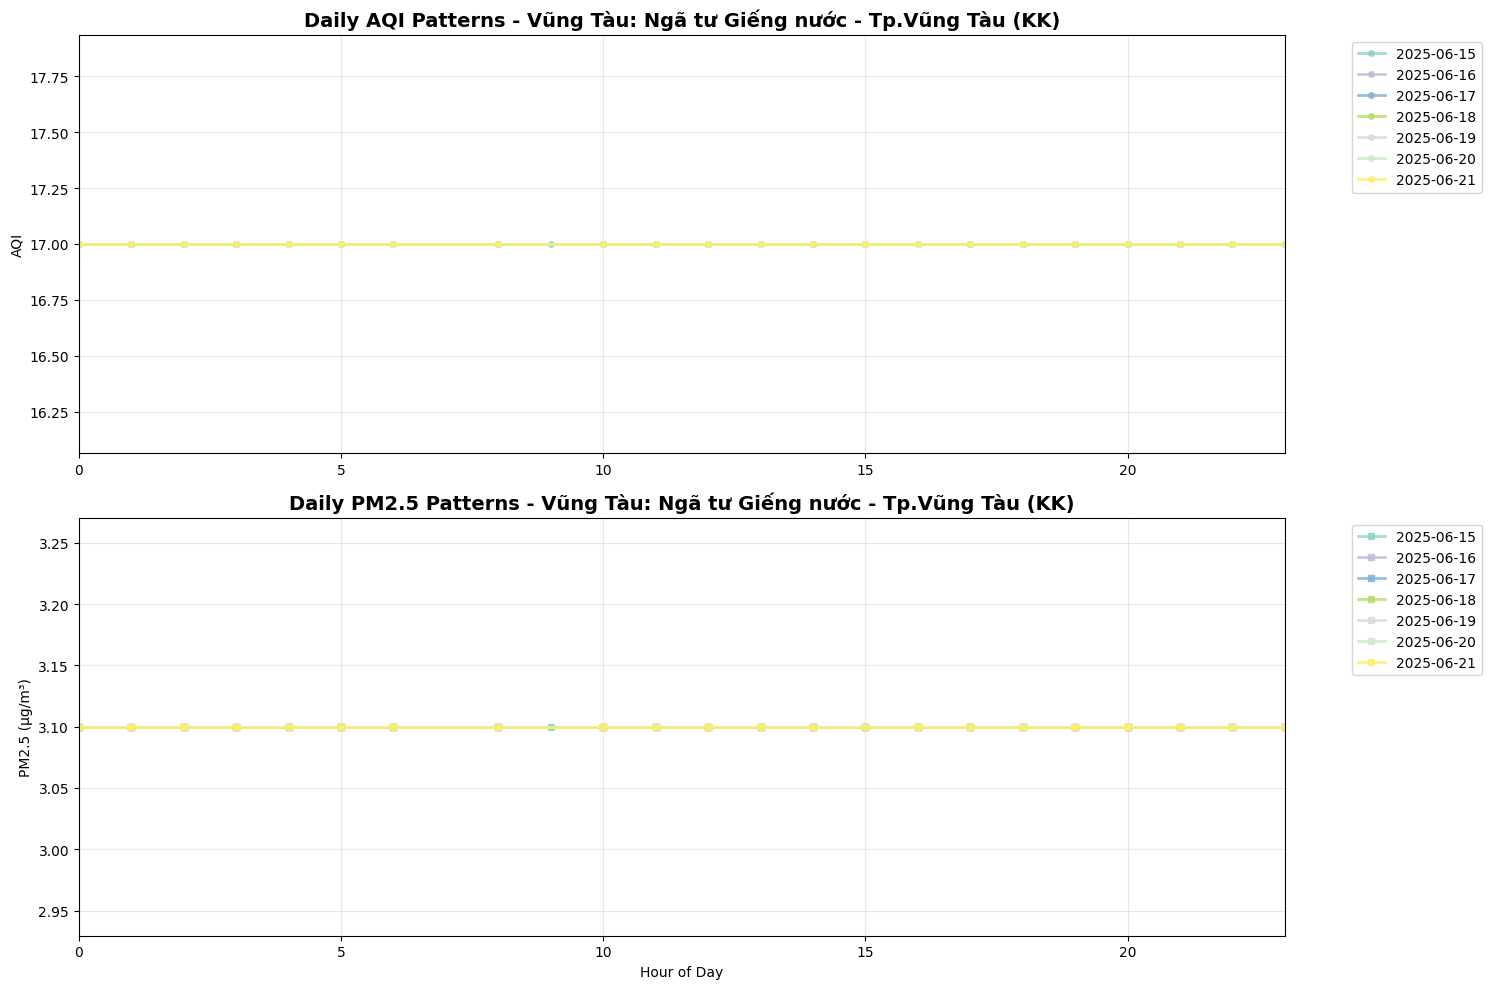


Hải Dương: UBND TP. Hải Dương - 106 Đường Trần Hưng Đạo (KK)


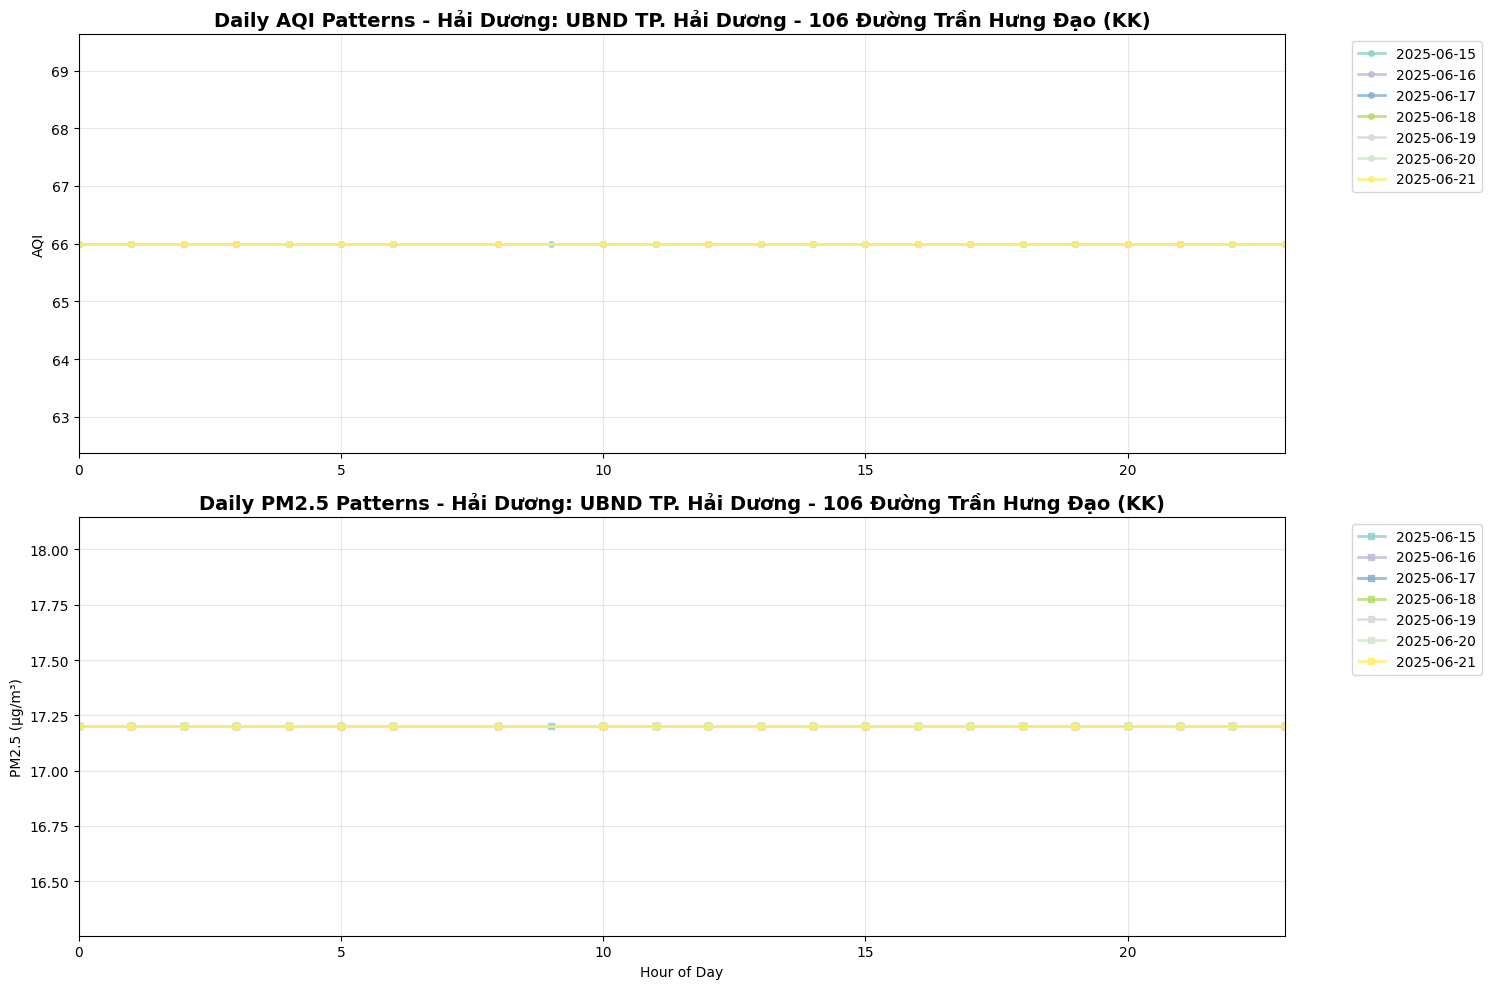


Thừa Thiên Huế: 83 đường Hùng Vương (KK)


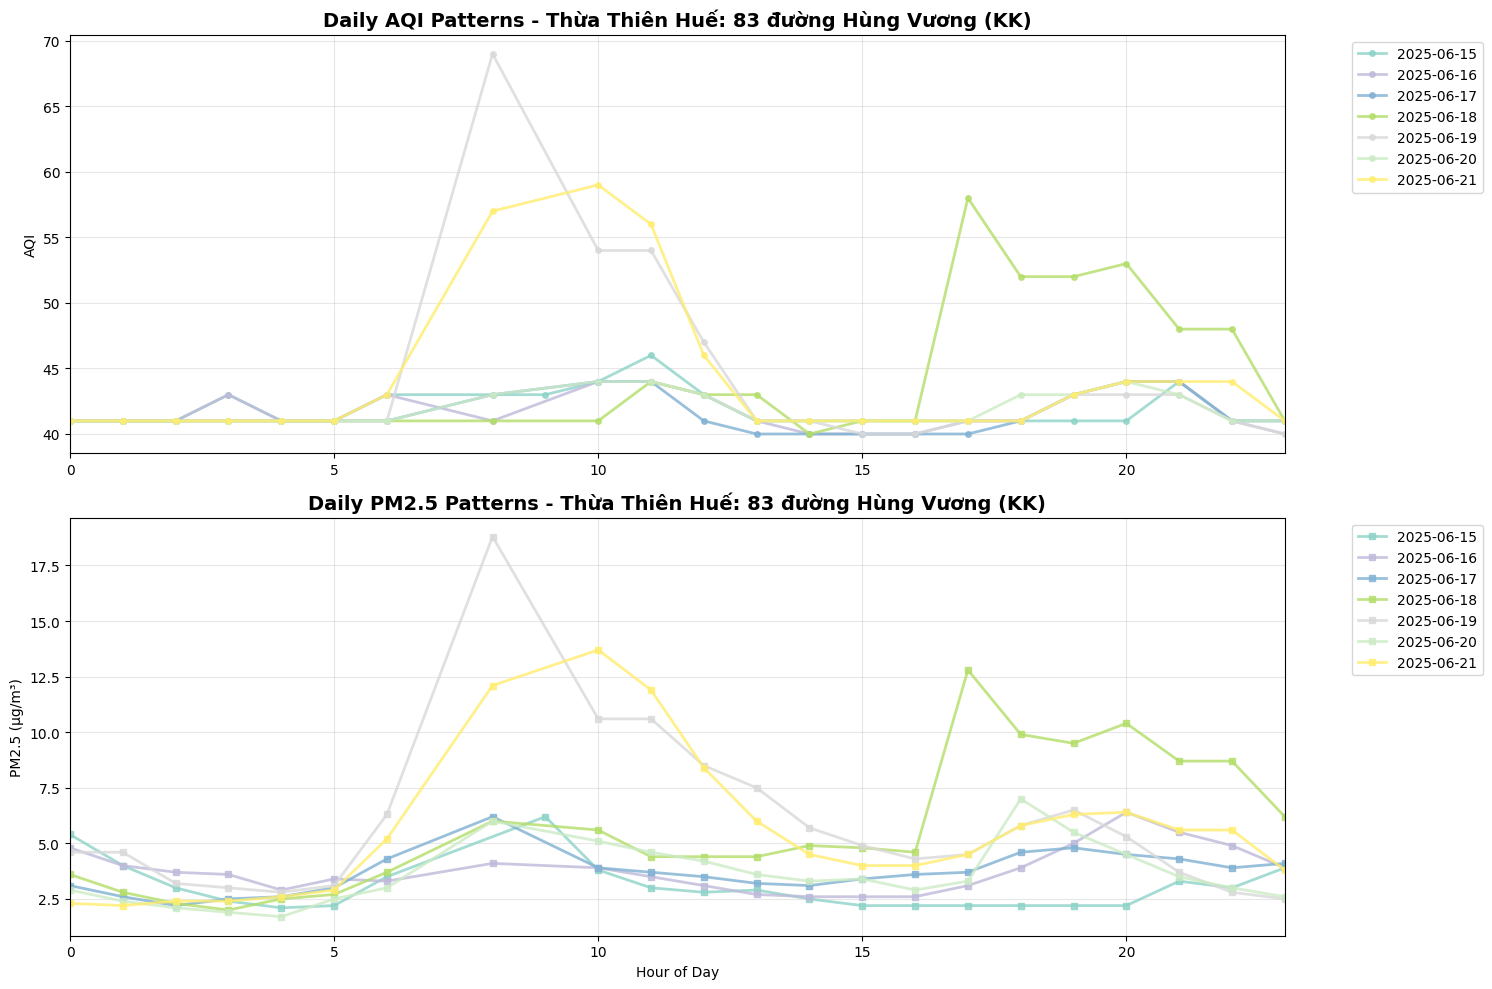


Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông - P. Bồ Xuyên - TP Thái Bình (KK)


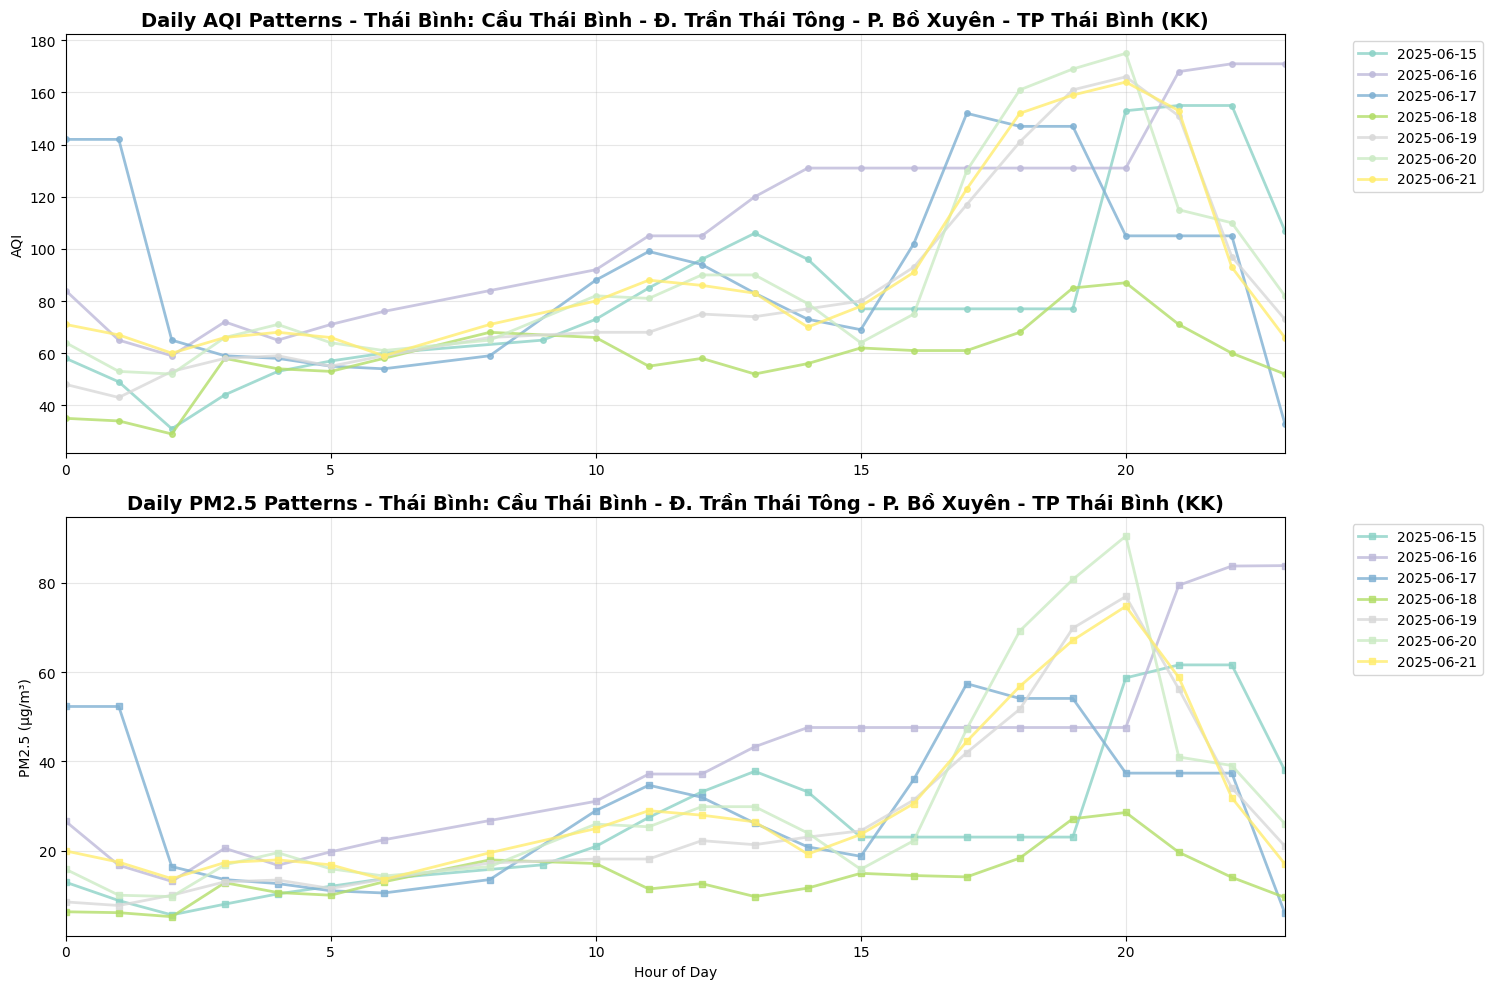


Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên (KK)


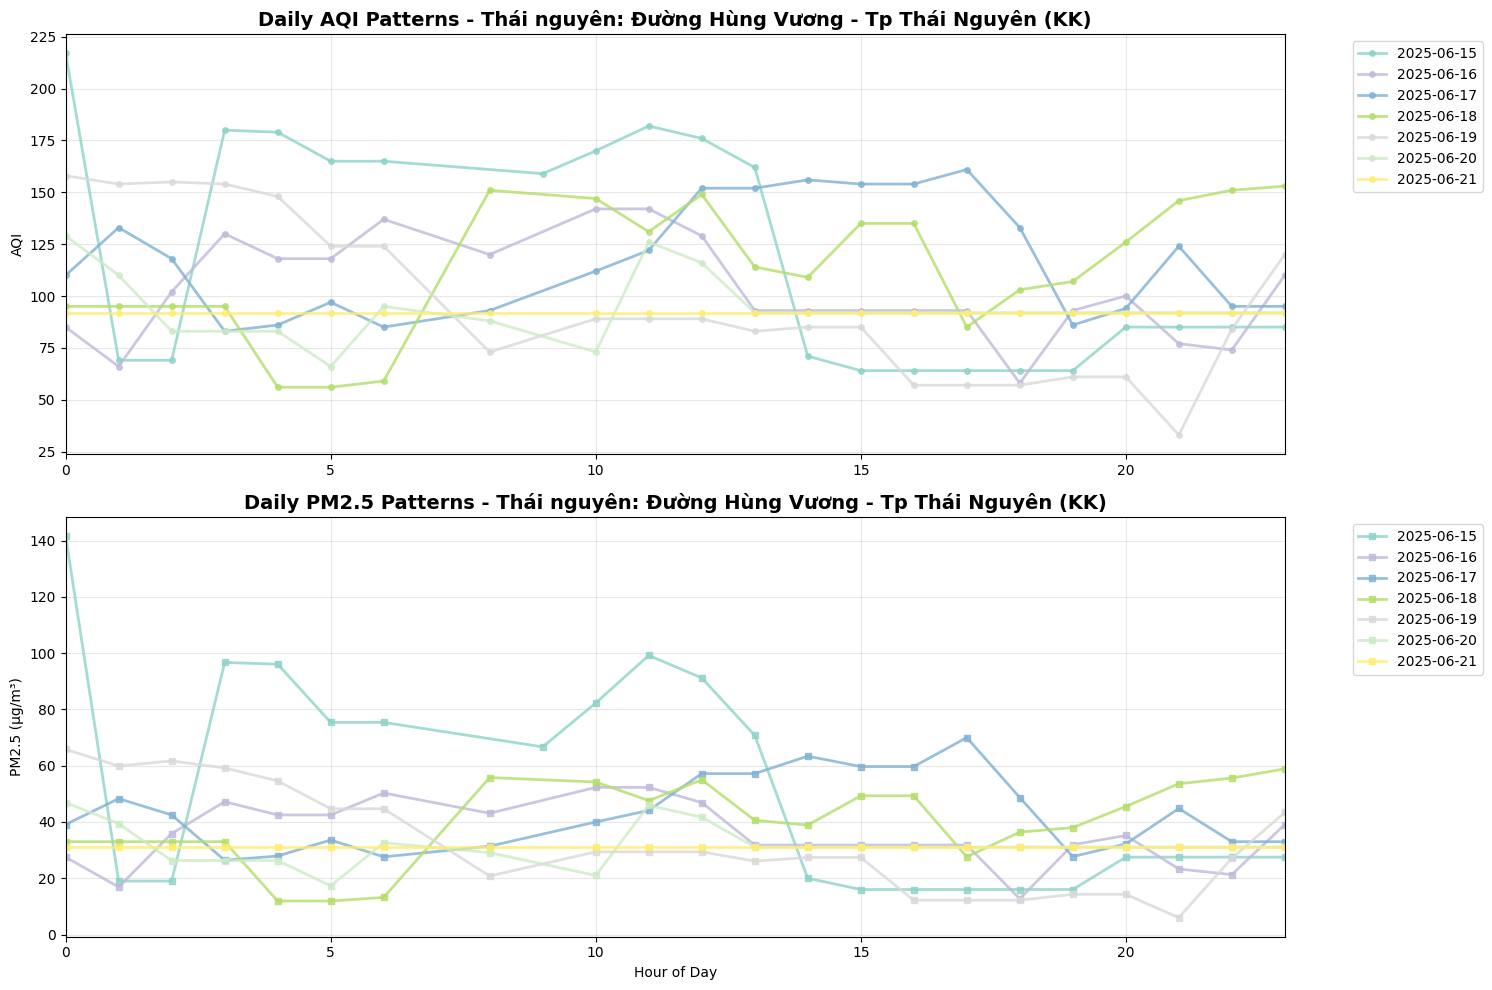


Quảng Bình: Khu kinh tế Hòn La (KK)


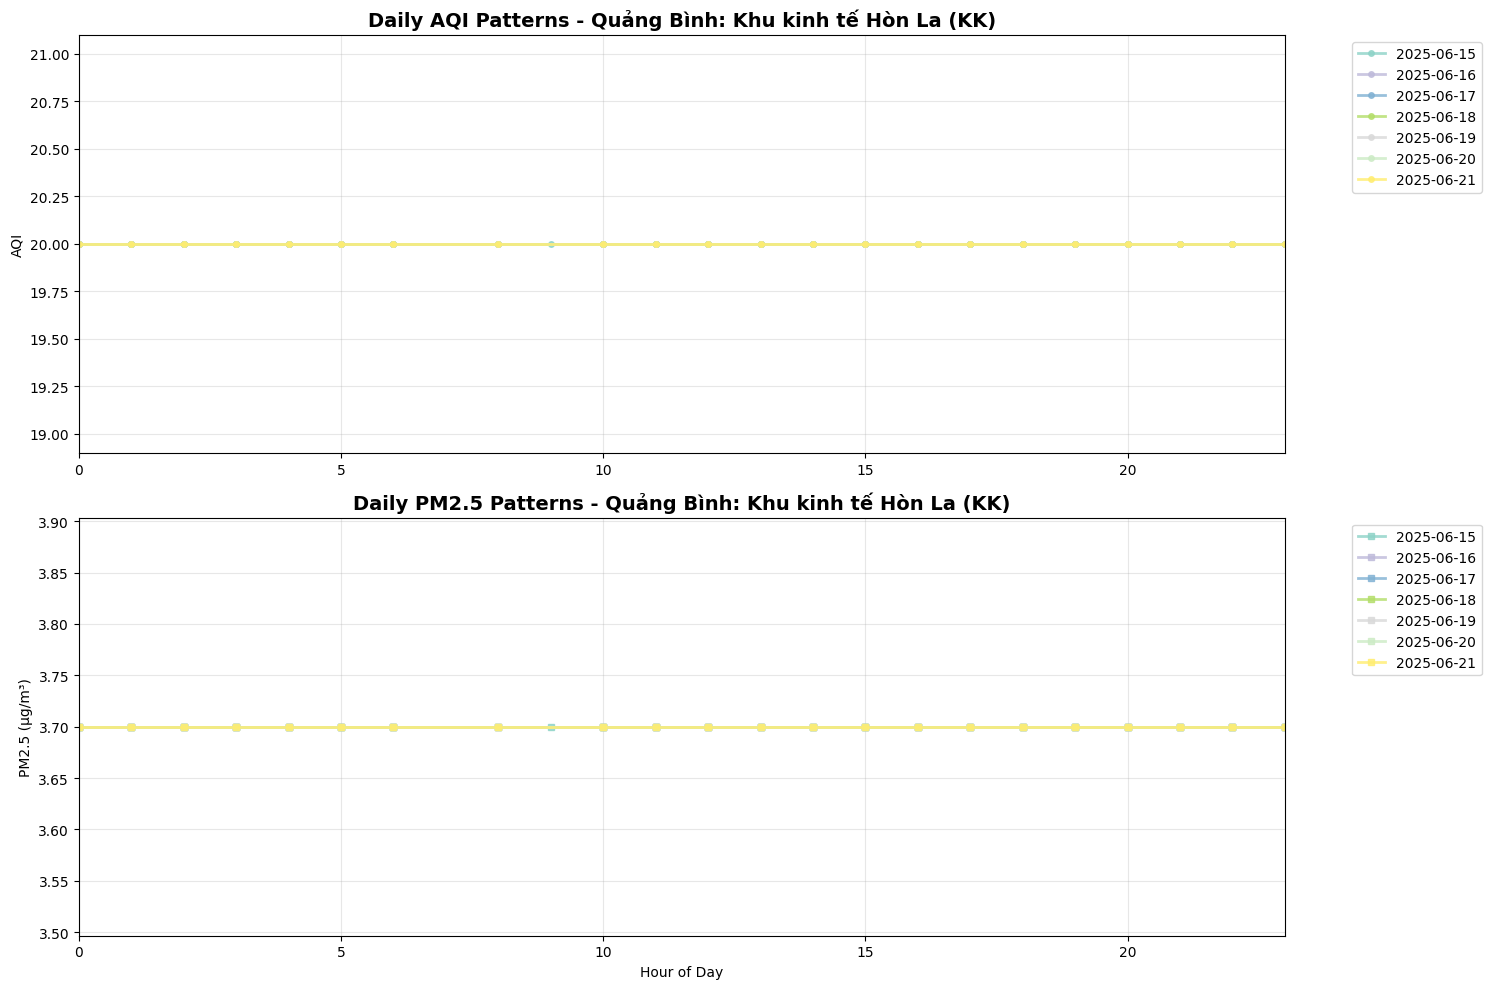


Trà Vinh: Tp. Trà Vinh (KK)


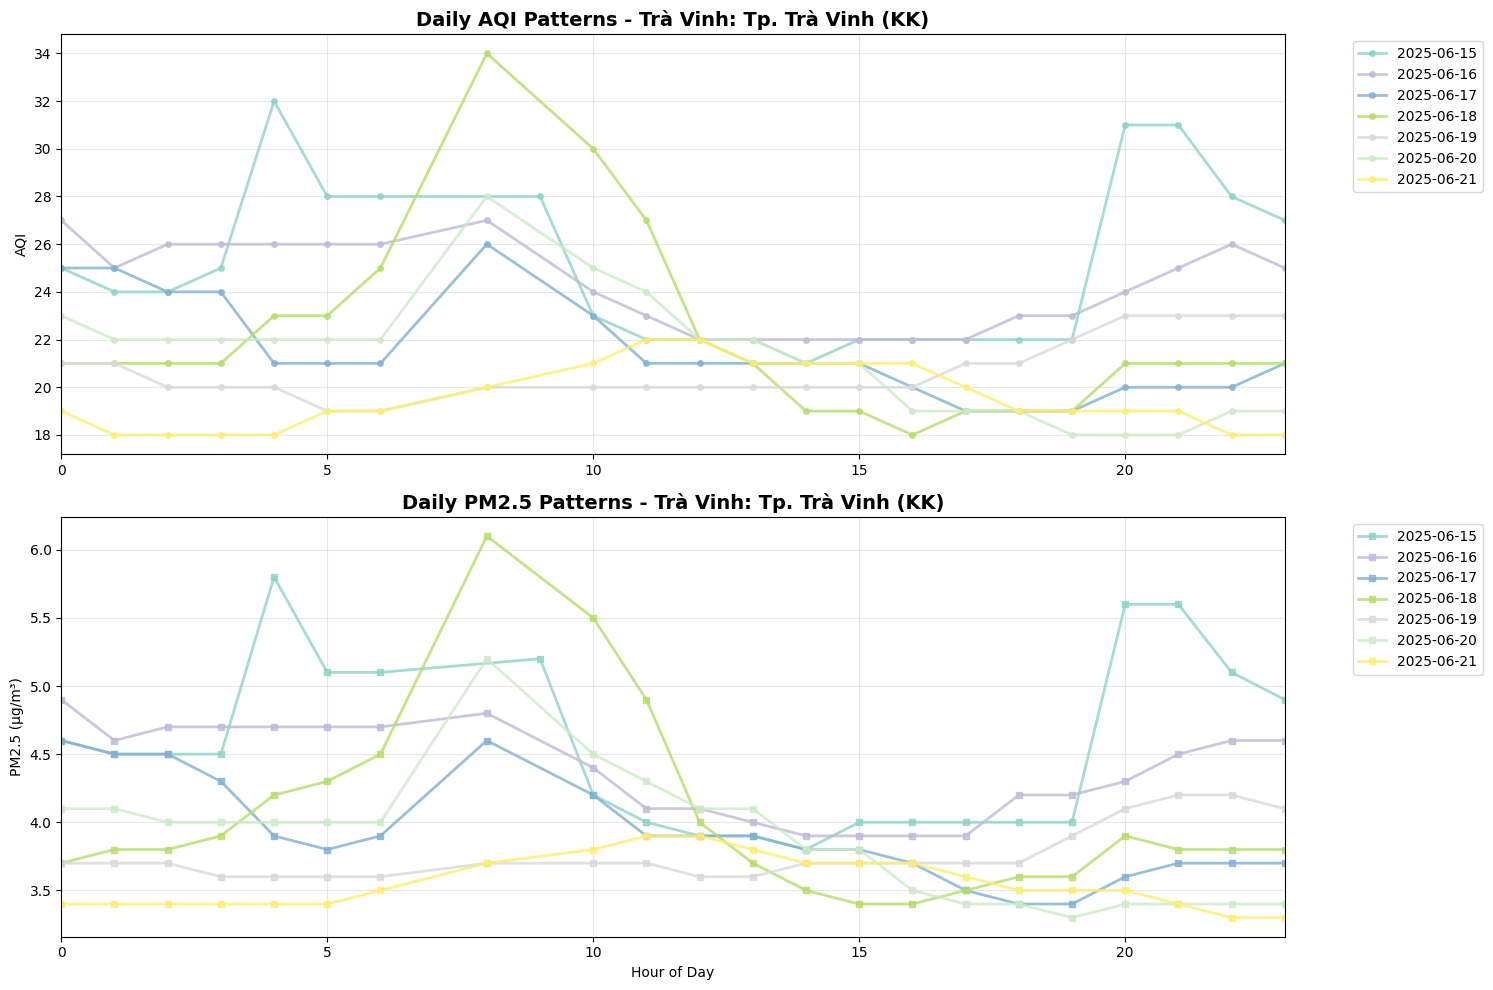


Hà Nội: Chi cục BVMT (KK)


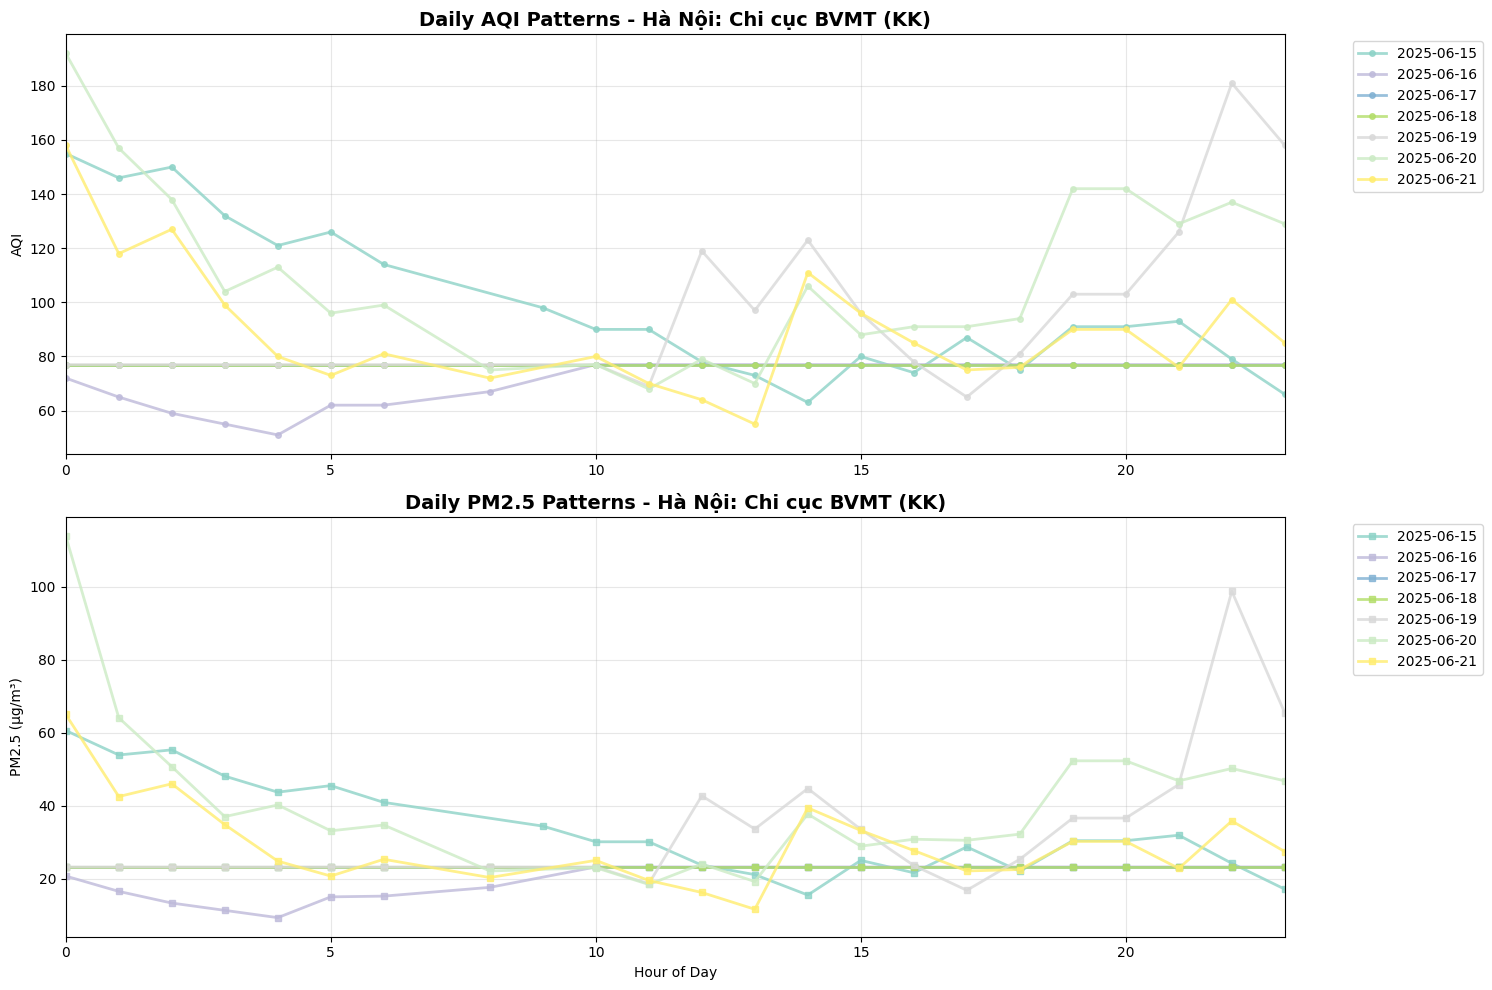


IQAir Ha Noi


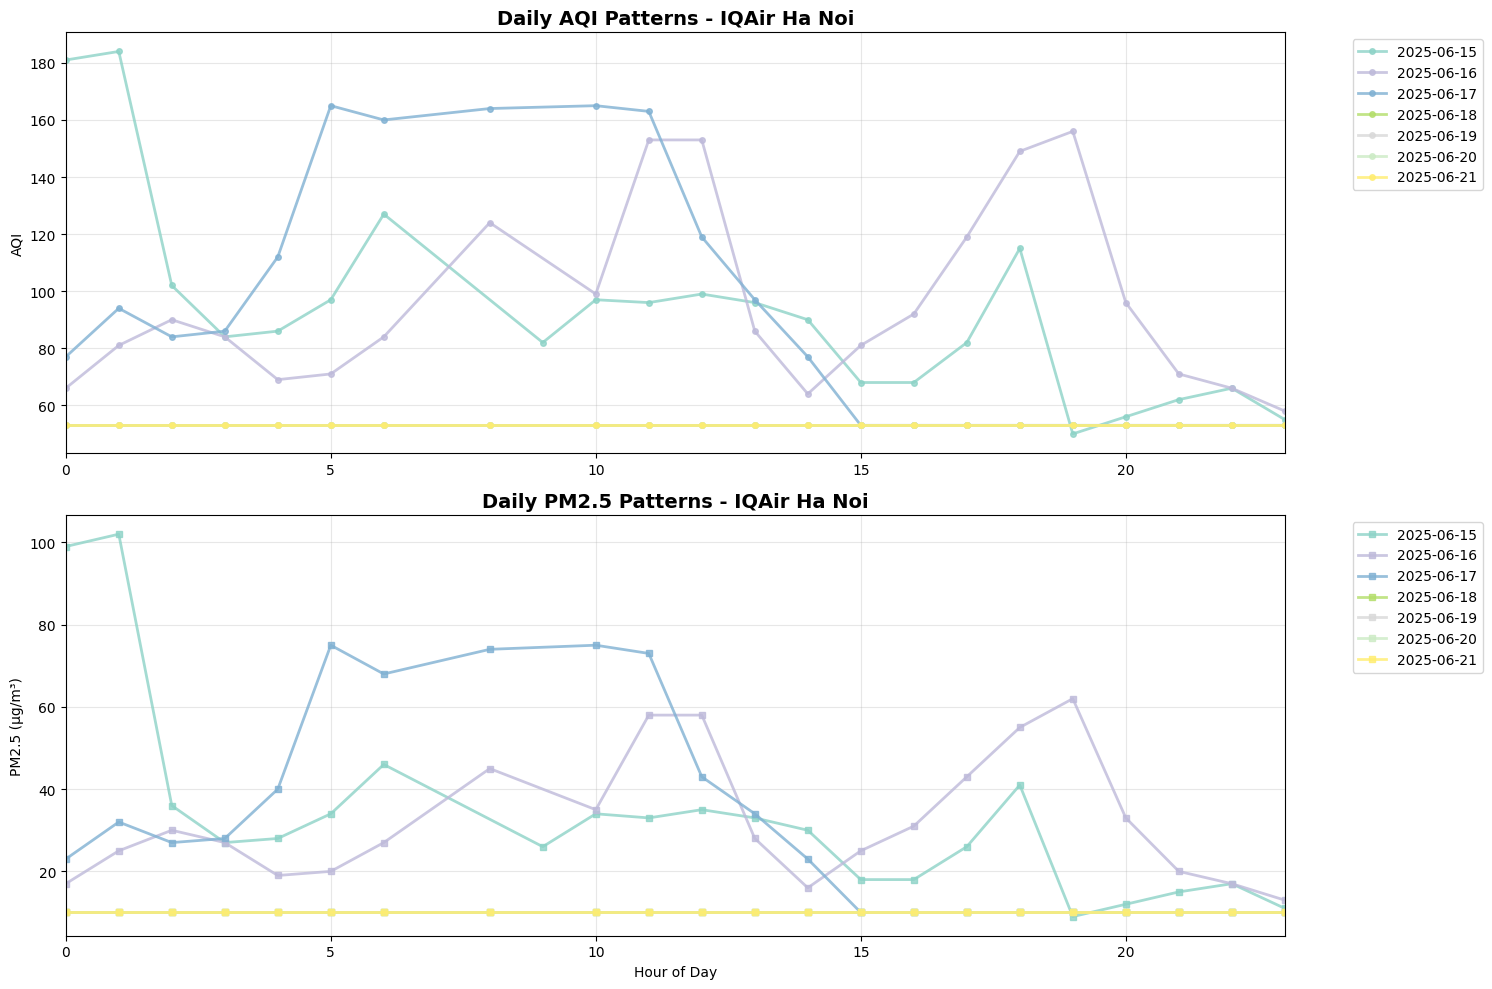


FPT


C:\Users\DELL\AppData\Local\Temp\ipykernel_24464\660722482.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
C:\Users\DELL\AppData\Local\Temp\ipykernel_24464\660722482.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')


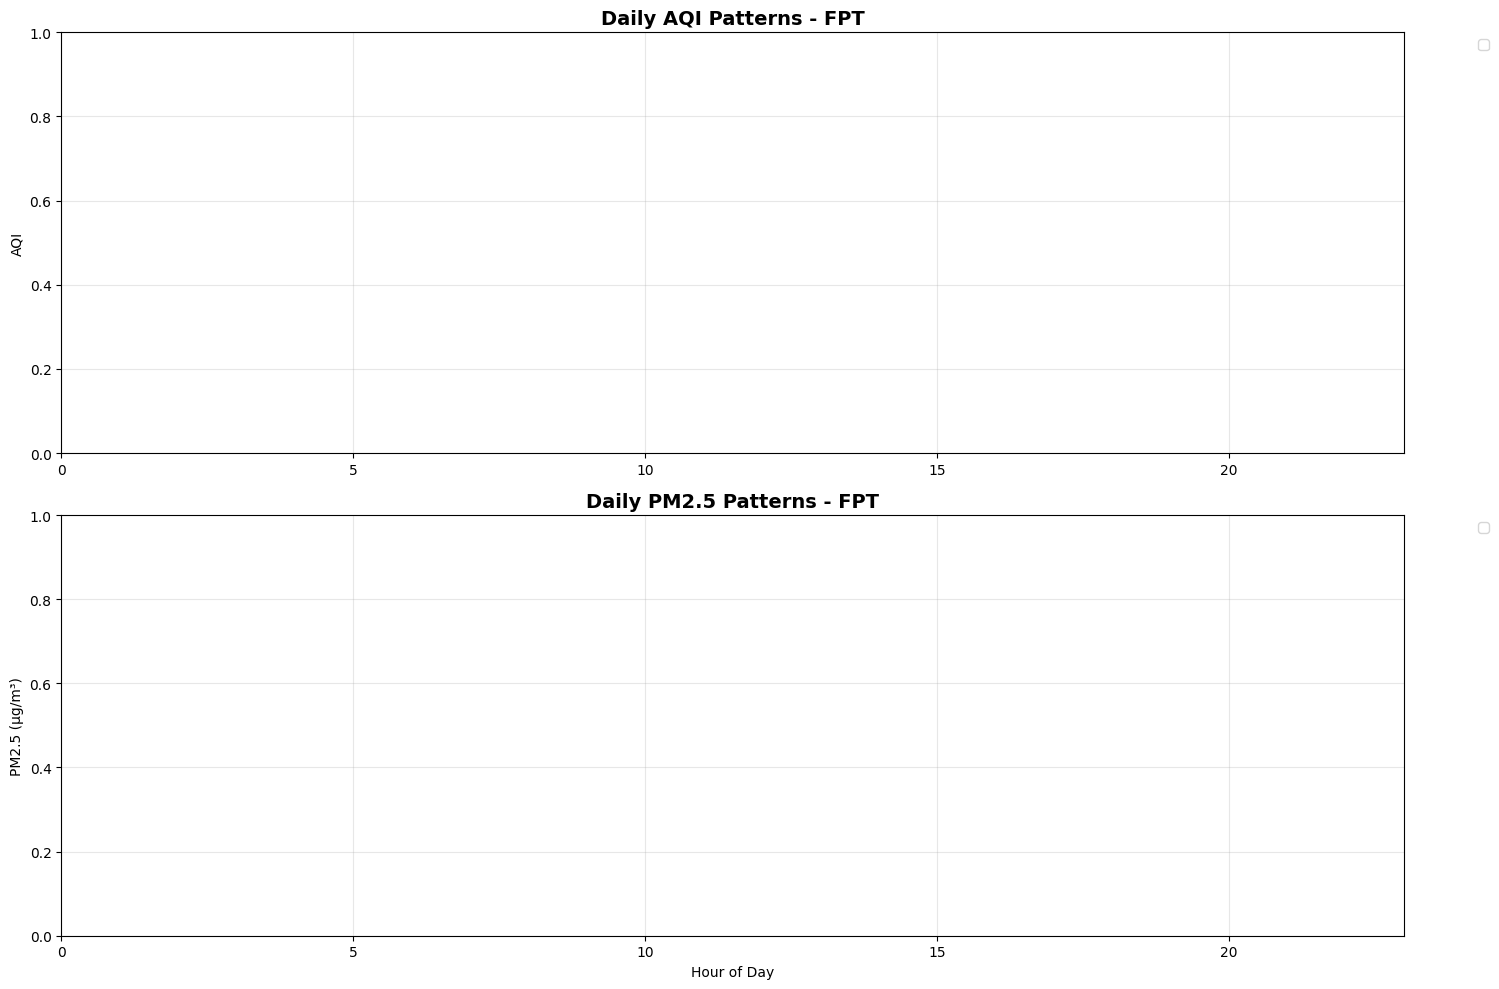


Hà Nội: TT giao lưu văn hóa phố cổ - Hoàn Kiếm - Trạm cảm biến(KK)


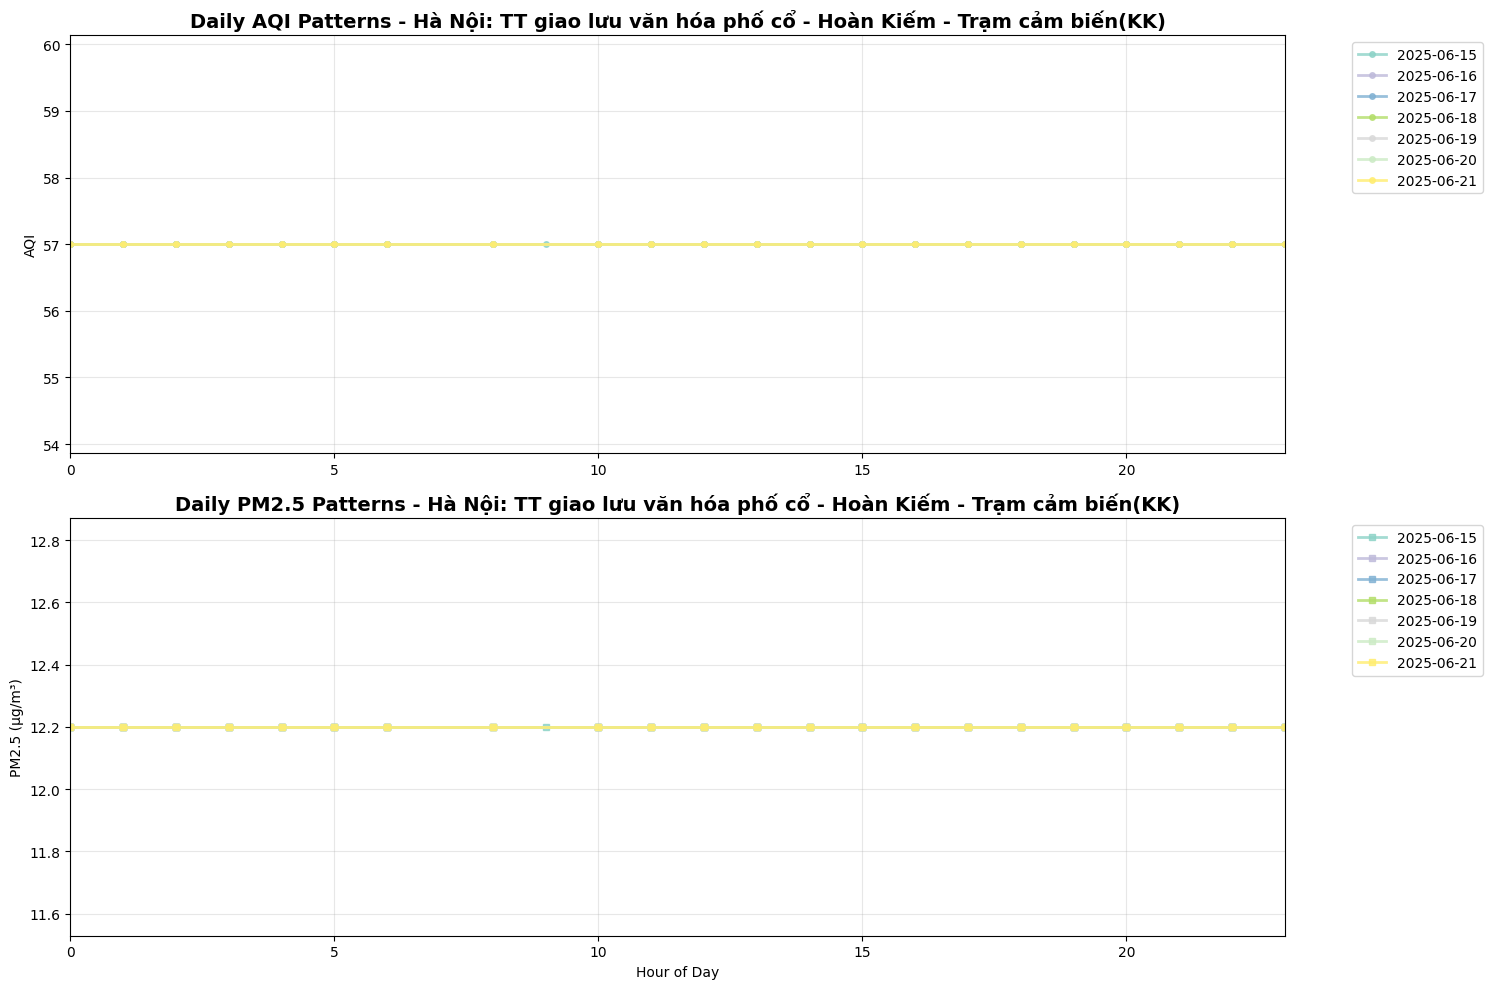


IQAir Vietnam - Saigon Pearl


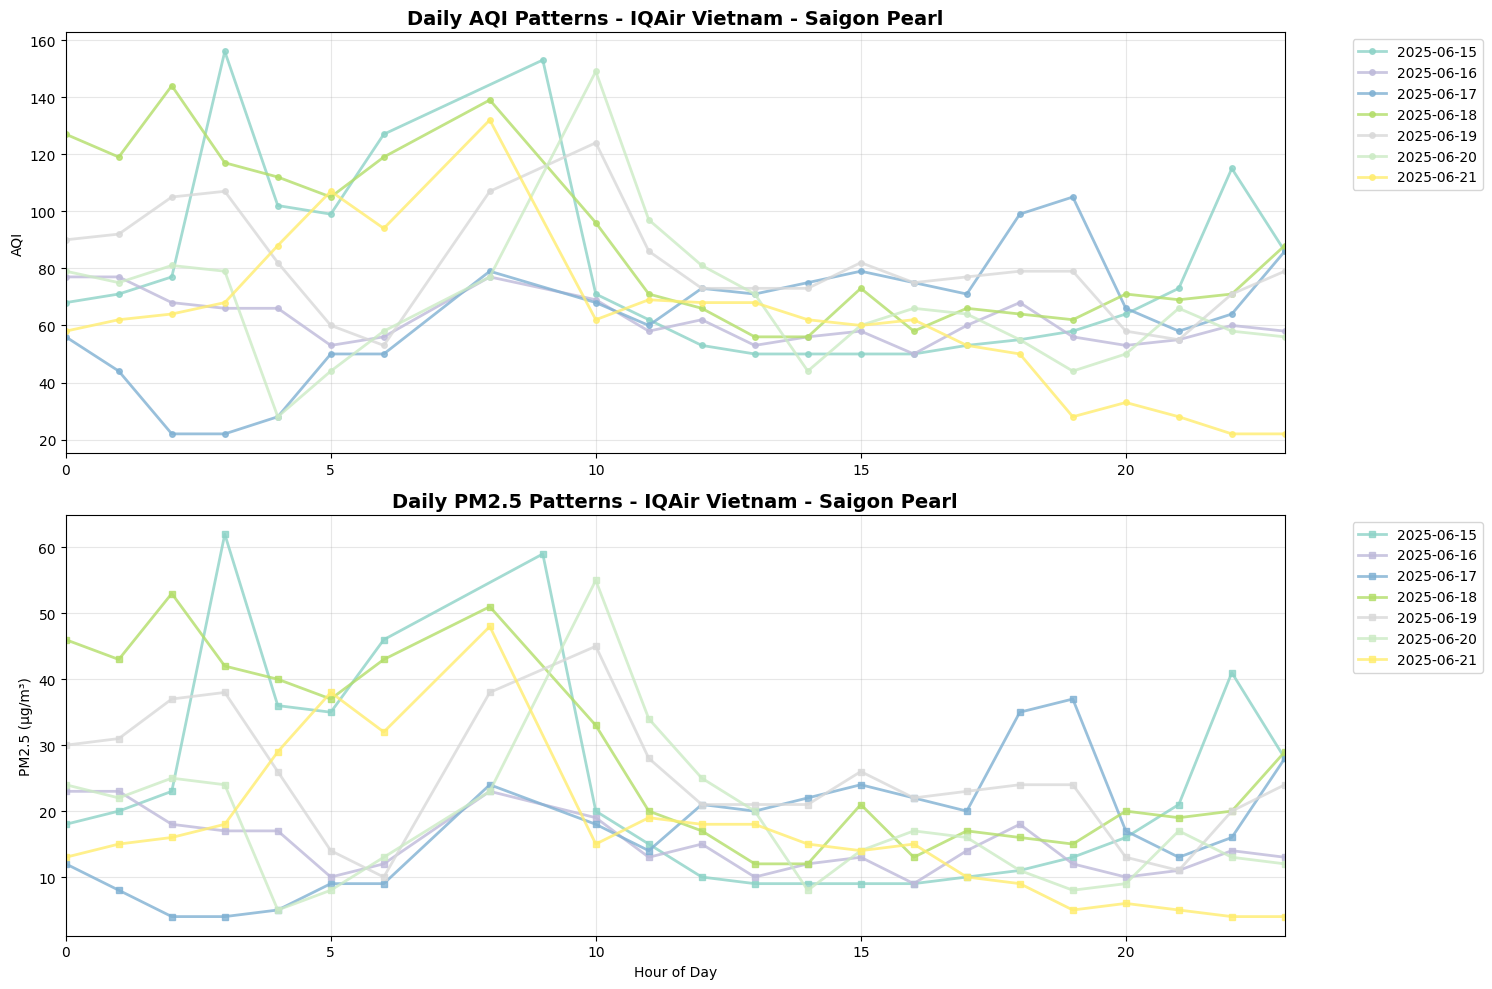


HCM - FPT Thuduc


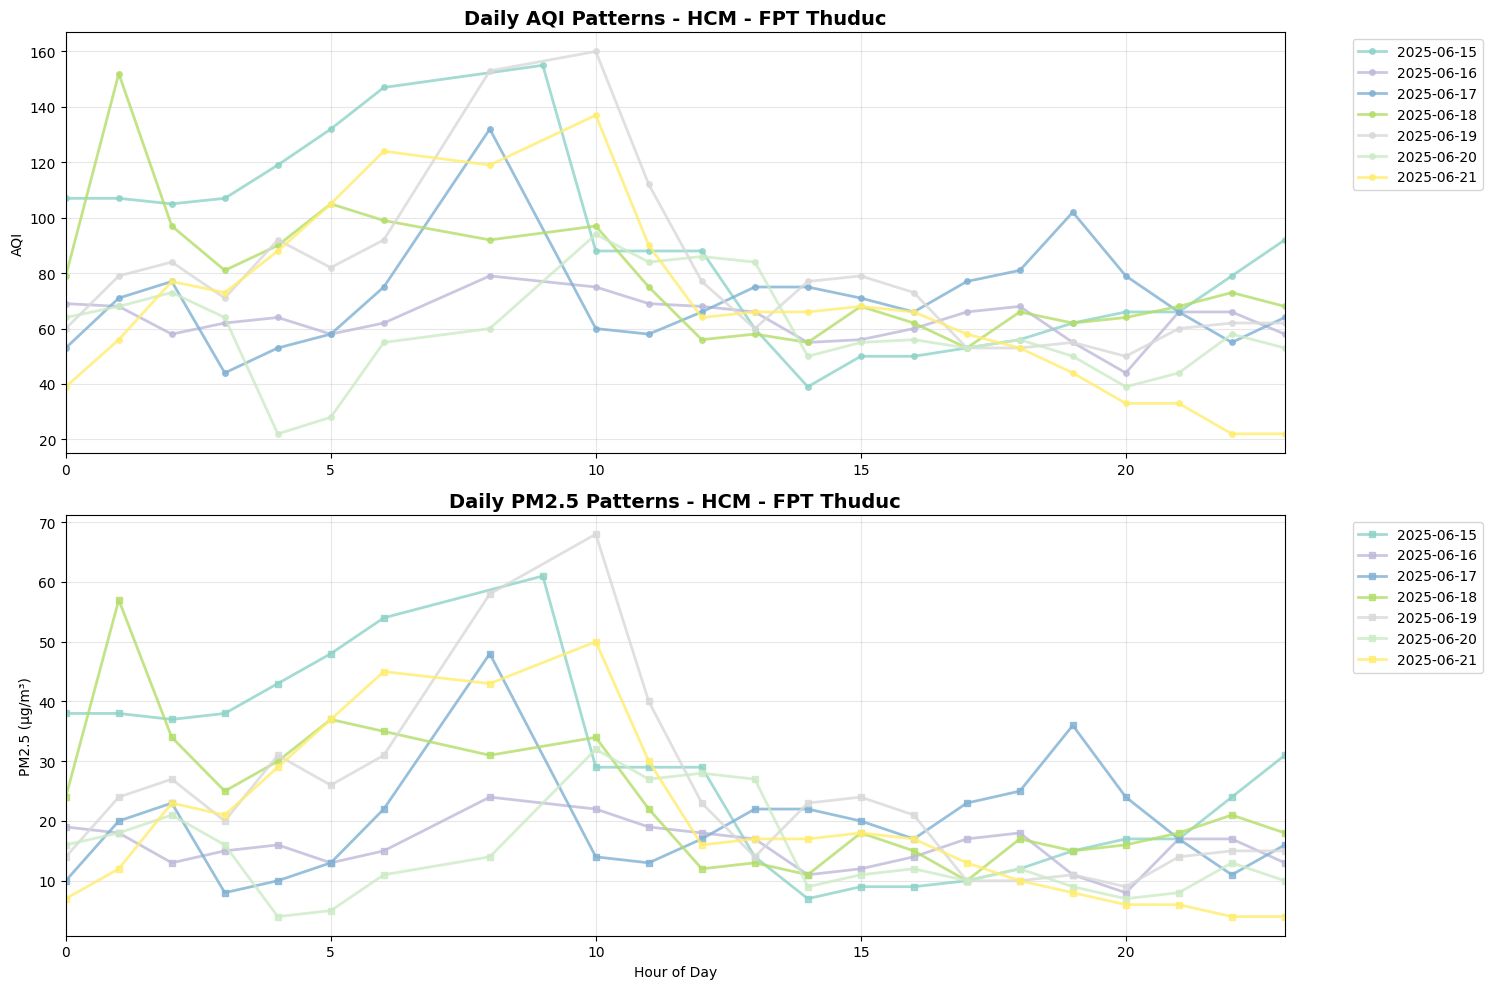

In [3]:
def plot_daily_patterns(df, station_name=None, metric='aqi', start_date='2025-06-15', days=7):
    # Convert dates to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])

    # Compute end date
    start_date = pd.to_datetime(start_date)
    end_date = start_date + pd.Timedelta(days=days - 1)

    # Filter data
    data = df[(df['station_name'] == station_name) & 
              (df['date'] >= start_date) & 
              (df['date'] <= end_date)].copy()
    
    title_suffix = f" - {station_name}"

    # Prepare unique dates
    unique_dates = sorted(data['date'].dt.date.unique())
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_dates)))

    # Set up subplots
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # AQI plot
    for i, date in enumerate(unique_dates):
        day_data = data[data['date'].dt.date == date]
        if not day_data.empty:
            hourly_data = day_data.groupby('hour')['aqi'].mean().reset_index()
            axes[0].plot(hourly_data['hour'], hourly_data['aqi'], 
                         marker='o', label=str(date), linewidth=2, 
                         markersize=4, color=colors[i], alpha=0.8)

    axes[0].set_title(f'Daily AQI Patterns{title_suffix}', fontweight='bold', fontsize=14)
    axes[0].set_ylabel('AQI')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 23)

    # PM2.5 plot
    for i, date in enumerate(unique_dates):
        day_data = data[data['date'].dt.date == date]
        if not day_data.empty:
            hourly_data = day_data.groupby('hour')['PM2.5 (µg/m³)'].mean().reset_index()
            axes[1].plot(hourly_data['hour'], hourly_data['PM2.5 (µg/m³)'], 
                         marker='s', label=str(date), linewidth=2, 
                         markersize=4, color=colors[i], alpha=0.8)

    axes[1].set_title(f'Daily PM2.5 Patterns{title_suffix}', fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('PM2.5 (µg/m³)')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 23)

    plt.tight_layout()
    plt.show()

stations = df['station_name'].unique()

for station in stations:
    print(f"\n{station}")
    plot_daily_patterns(df, station_name=station, start_date='2025-06-15', days=7)

In [4]:
def plot_individual_station_patterns(df, station_name):
    station_data = df[df['station_name'] == station_name].copy()

    hourly_stats = station_data.groupby('hour').agg({
        'aqi': ['mean', 'std', 'count'],
        'PM2.5 (µg/m³)': ['mean', 'std', 'count']
    }).reset_index()
    
    hourly_stats.columns = ['hour', 'aqi_mean', 'aqi_std', 'aqi_count', 
                           'pm25_mean', 'pm25_std', 'pm25_count']
    
    #Fill Nan values
    hourly_stats['aqi_std'] = hourly_stats['aqi_std'].fillna(0)
    hourly_stats['pm25_std'] = hourly_stats['pm25_std'].fillna(0)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    #Plot AQI
    axes[0].plot(hourly_stats['hour'], hourly_stats['aqi_mean'], 
                'o-', linewidth=3, markersize=8, color='blue', label='Mean AQI')
    
    if hourly_stats['aqi_count'].min() > 1:
        axes[0].fill_between(hourly_stats['hour'],
                           hourly_stats['aqi_mean'] - hourly_stats['aqi_std'],
                           hourly_stats['aqi_mean'] + hourly_stats['aqi_std'],
                           alpha=0.3, color='blue', label='±1 Std Dev')
    
    axes[0].set_title(f'Hourly AQI Patterns - {station_name}', 
                     fontweight='bold', fontsize=14)
    axes[0].set_ylabel('AQI')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(0, 23)
    axes[0].set_xticks(range(0, 24, 2))
    
    #Plot PM2.5
    axes[1].plot(hourly_stats['hour'], hourly_stats['pm25_mean'], 
                's-', linewidth=3, markersize=8, color='purple', label='Mean PM2.5')
    
    if hourly_stats['pm25_count'].min() > 1:
        axes[1].fill_between(hourly_stats['hour'],
                           hourly_stats['pm25_mean'] - hourly_stats['pm25_std'],
                           hourly_stats['pm25_mean'] + hourly_stats['pm25_std'],
                           alpha=0.3, color='purple', label='±1 Std Dev')
    
    axes[1].set_title(f'Hourly PM2.5 Patterns - {station_name}', 
                     fontweight='bold', fontsize=14)
    axes[1].set_xlabel('Hour of Day')
    axes[1].set_ylabel('PM2.5 (µg/m³)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(0, 23)
    axes[1].set_xticks(range(0, 24, 2))
    
    plt.tight_layout()
    plt.show()

Hà Nội: Đại Học Bách Khoa cổng Parabol đường Giải Phóng (KK)


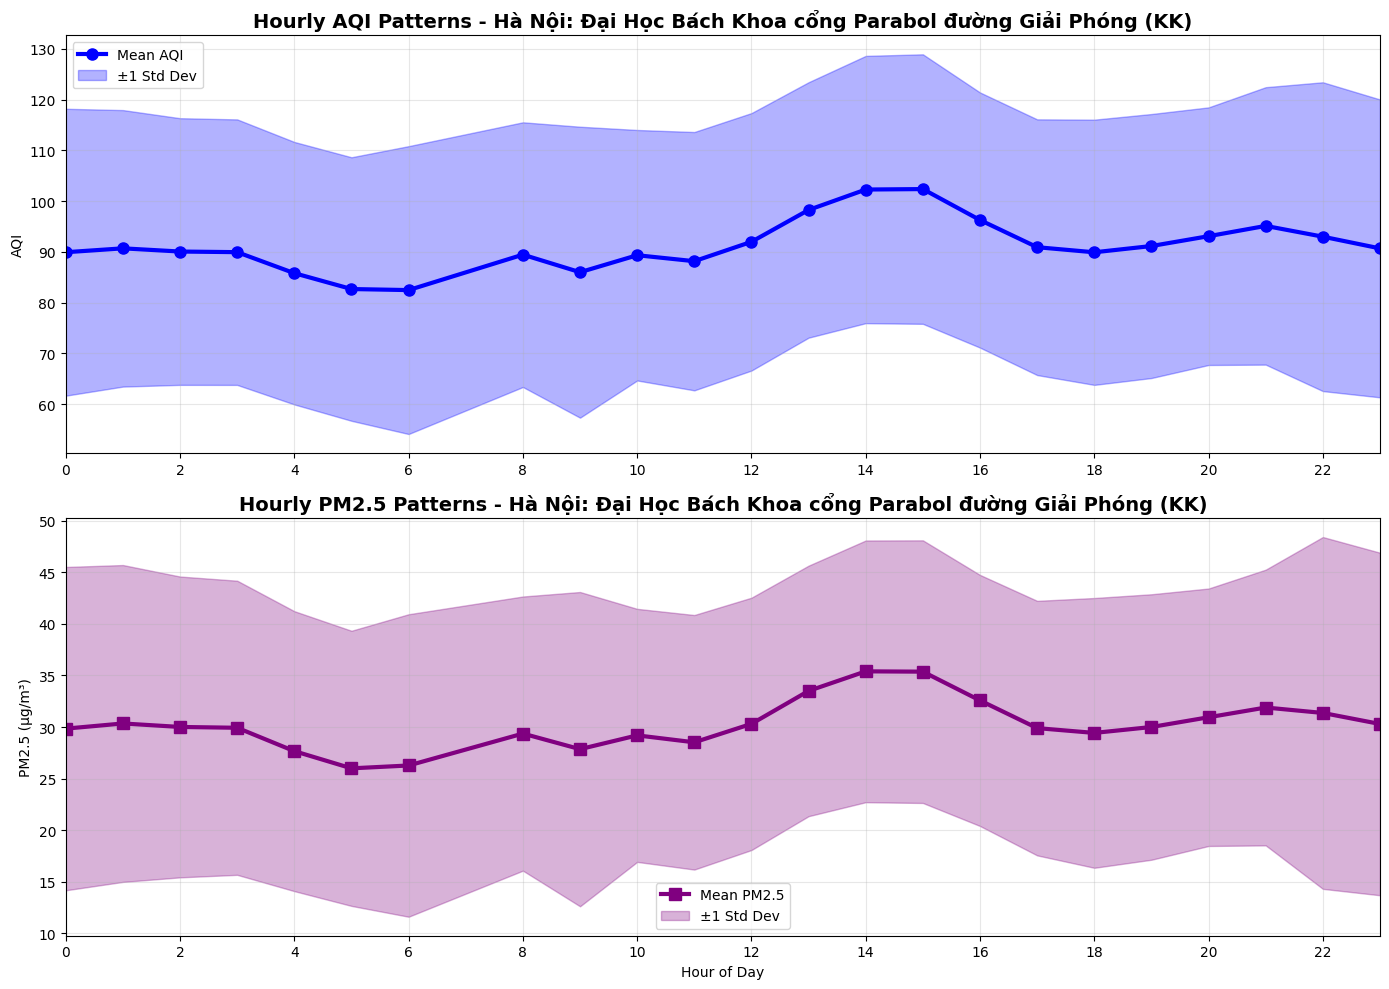

Hà Nội: Công viên hồ điều hòa Nhân Chính  Khuất Duy Tiến (KK)


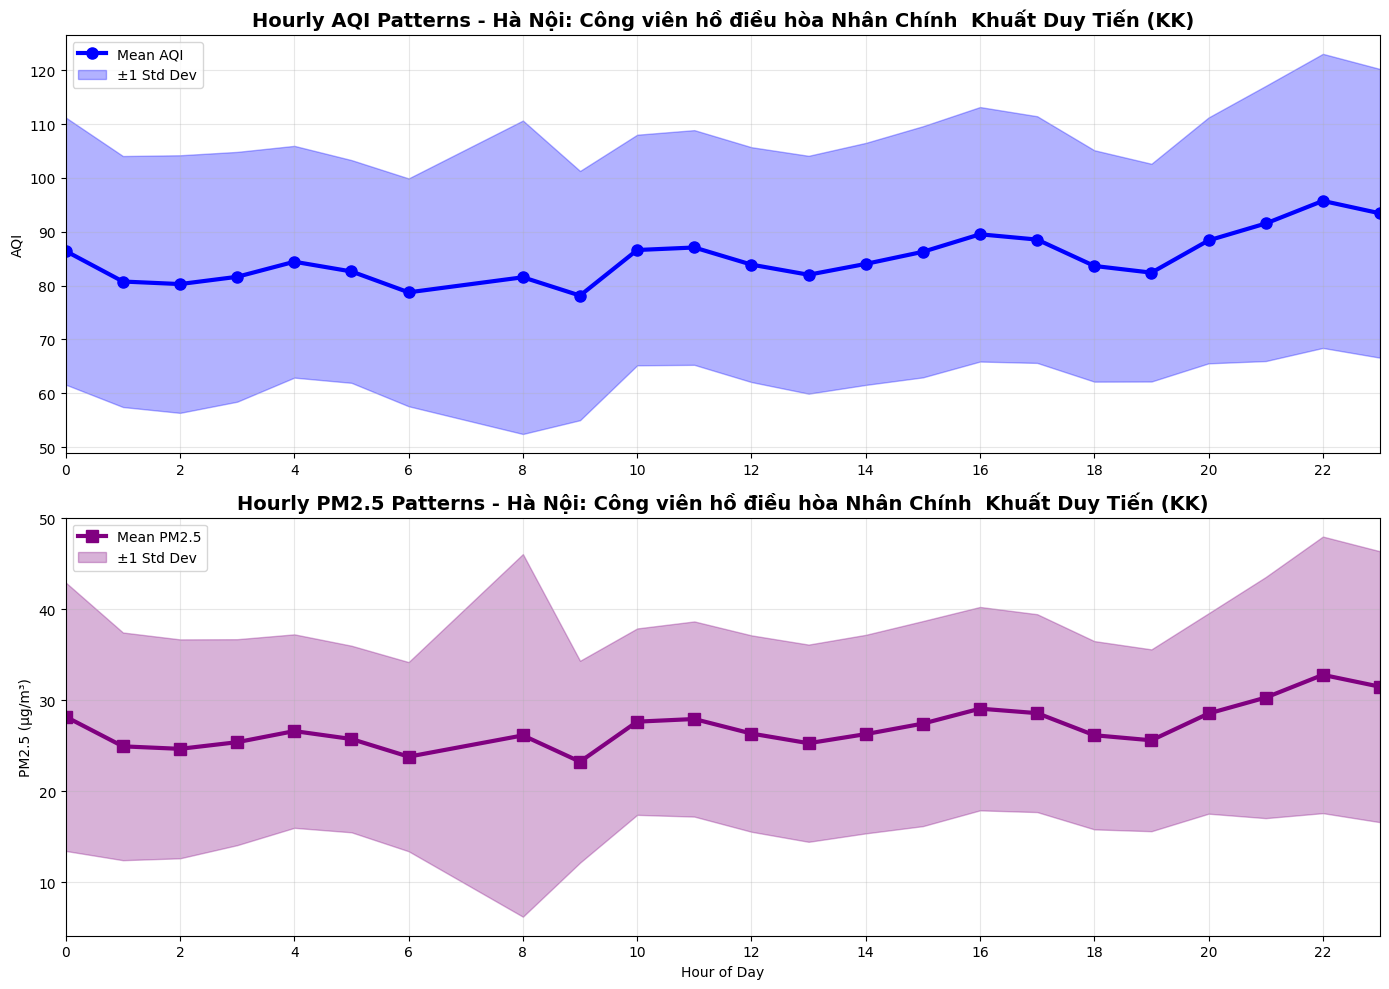

Minh Khai - Bắc Từ Liêm


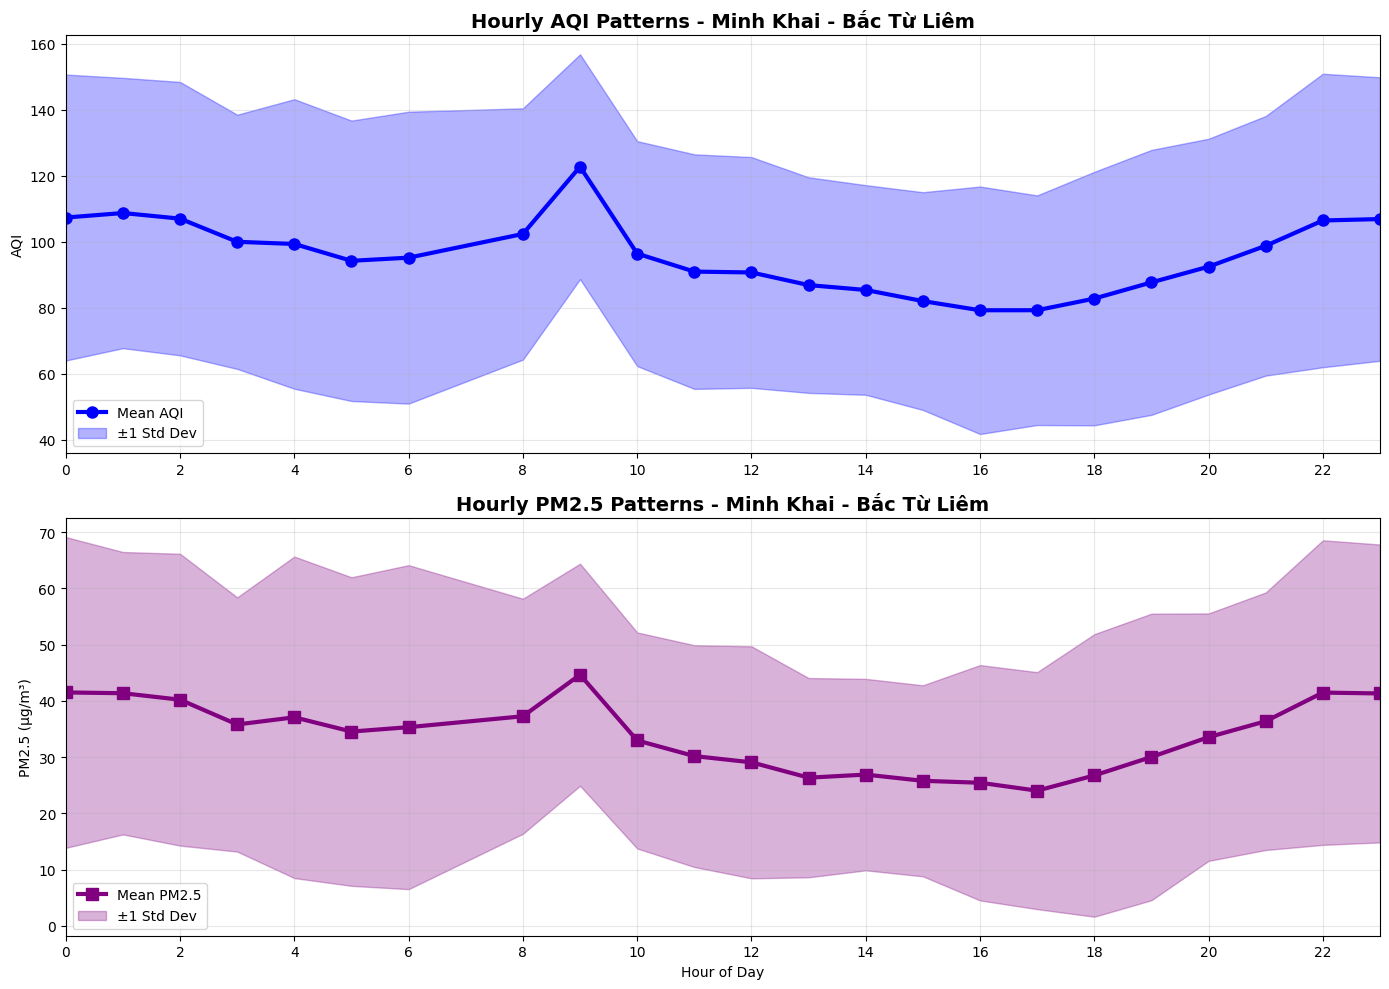

Vũng Tàu: Ngã tư Giếng nước - Tp.Vũng Tàu (KK)


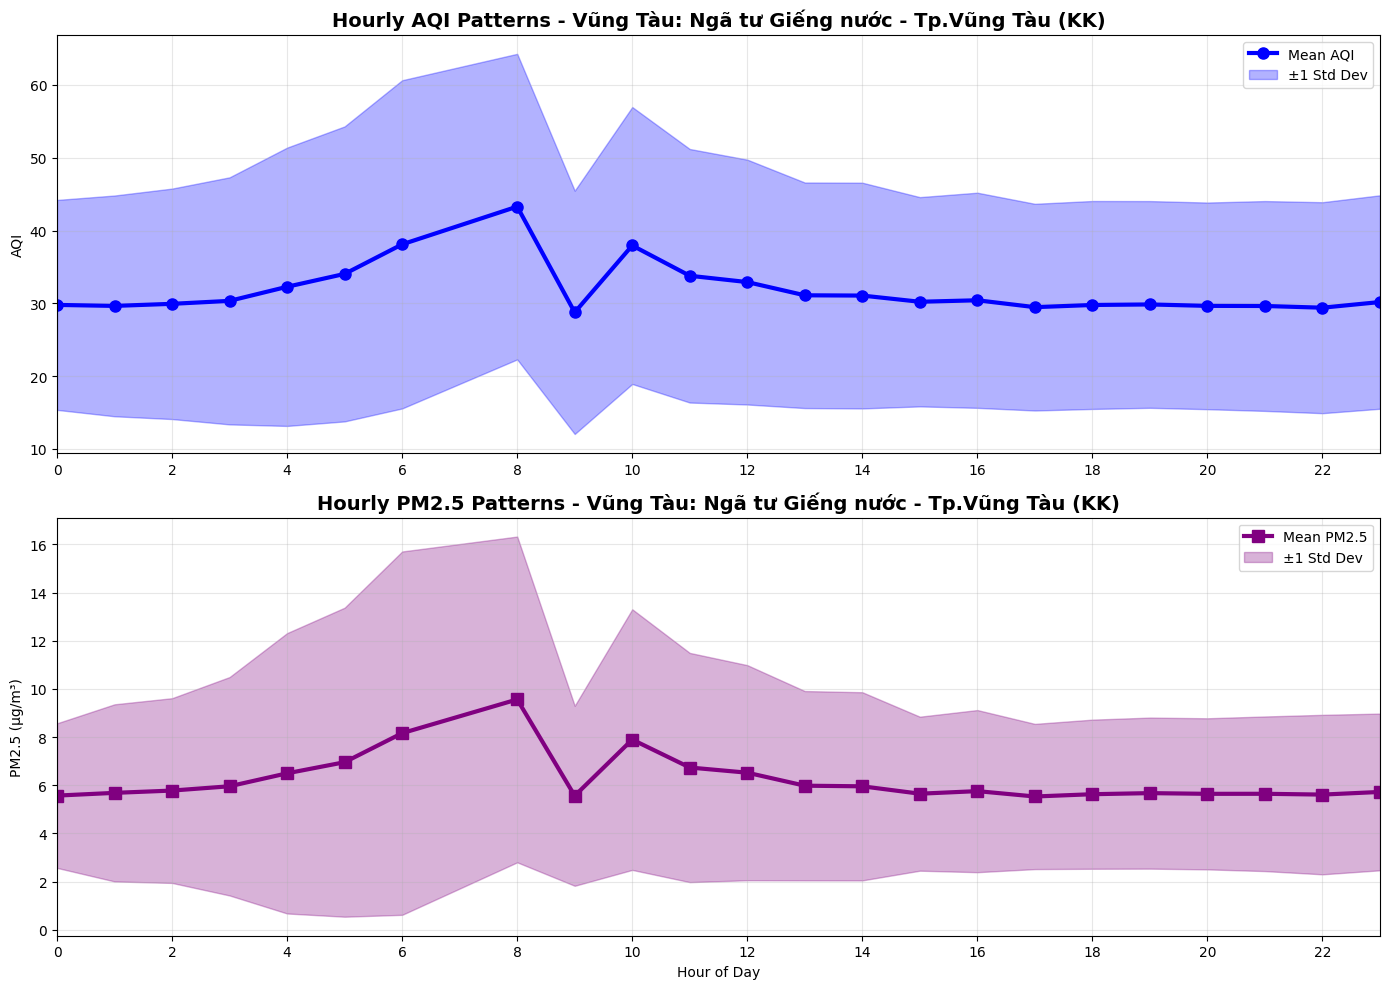

Hải Dương: UBND TP. Hải Dương - 106 Đường Trần Hưng Đạo (KK)


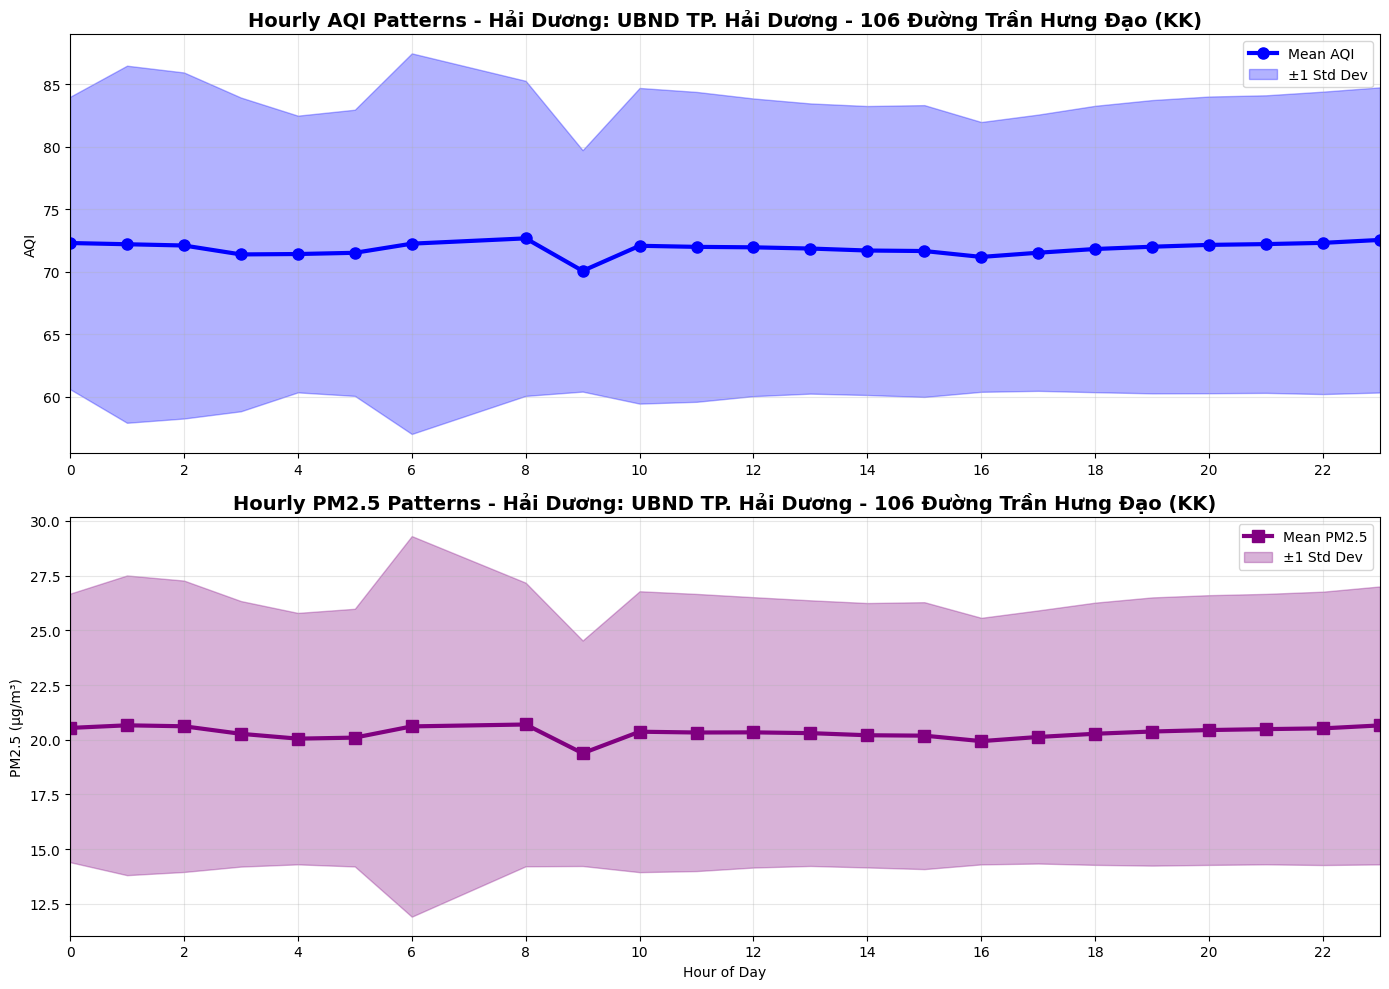

Thừa Thiên Huế: 83 đường Hùng Vương (KK)


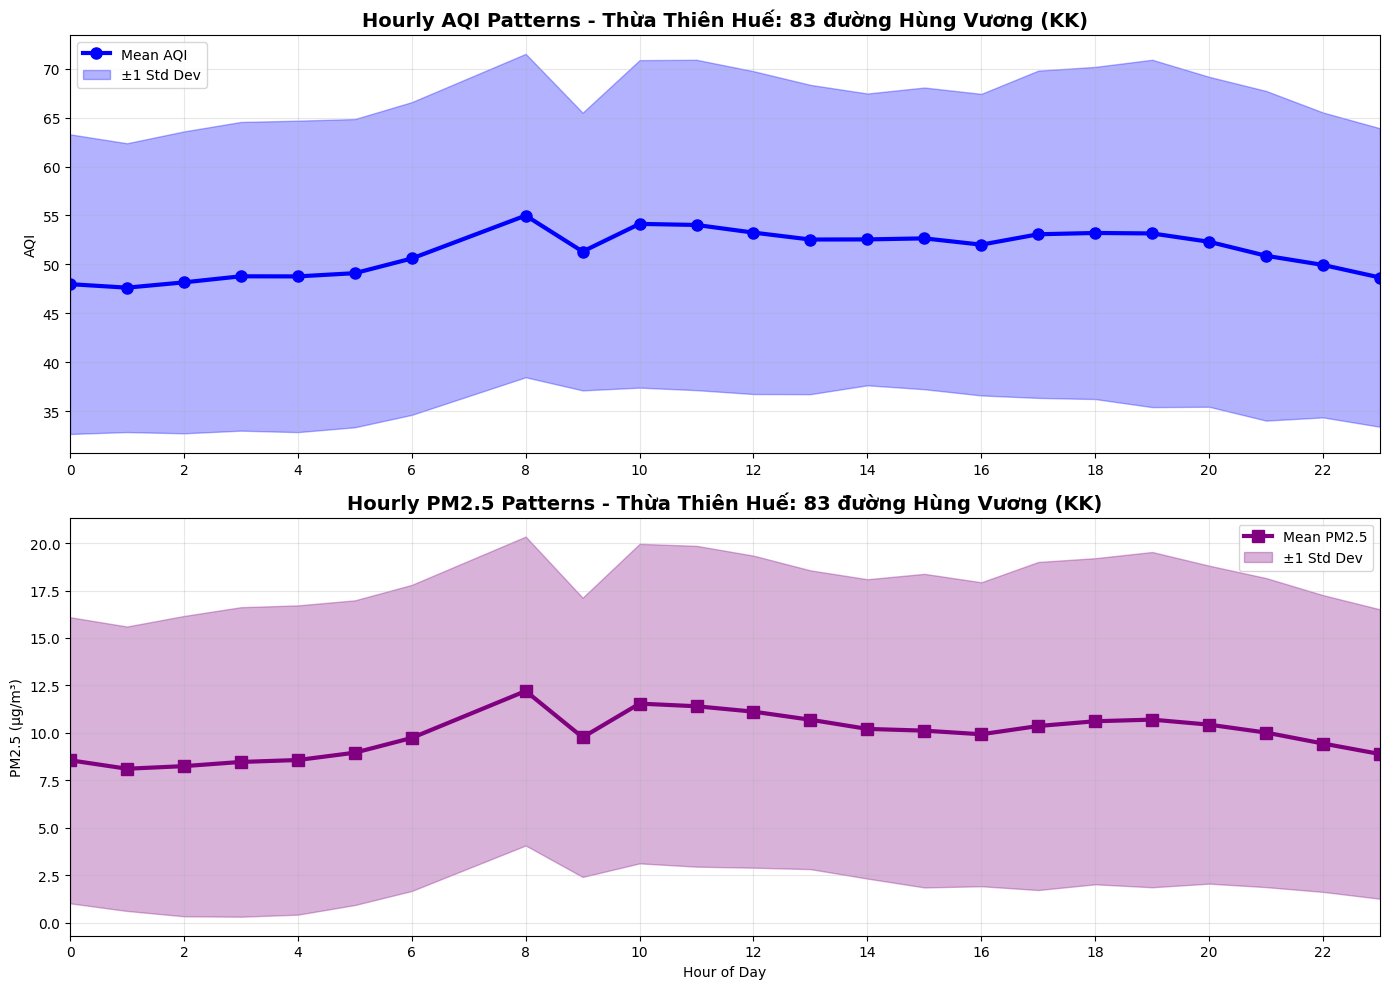

Thái Bình: Cầu Thái Bình - Đ. Trần Thái Tông - P. Bồ Xuyên - TP Thái Bình (KK)


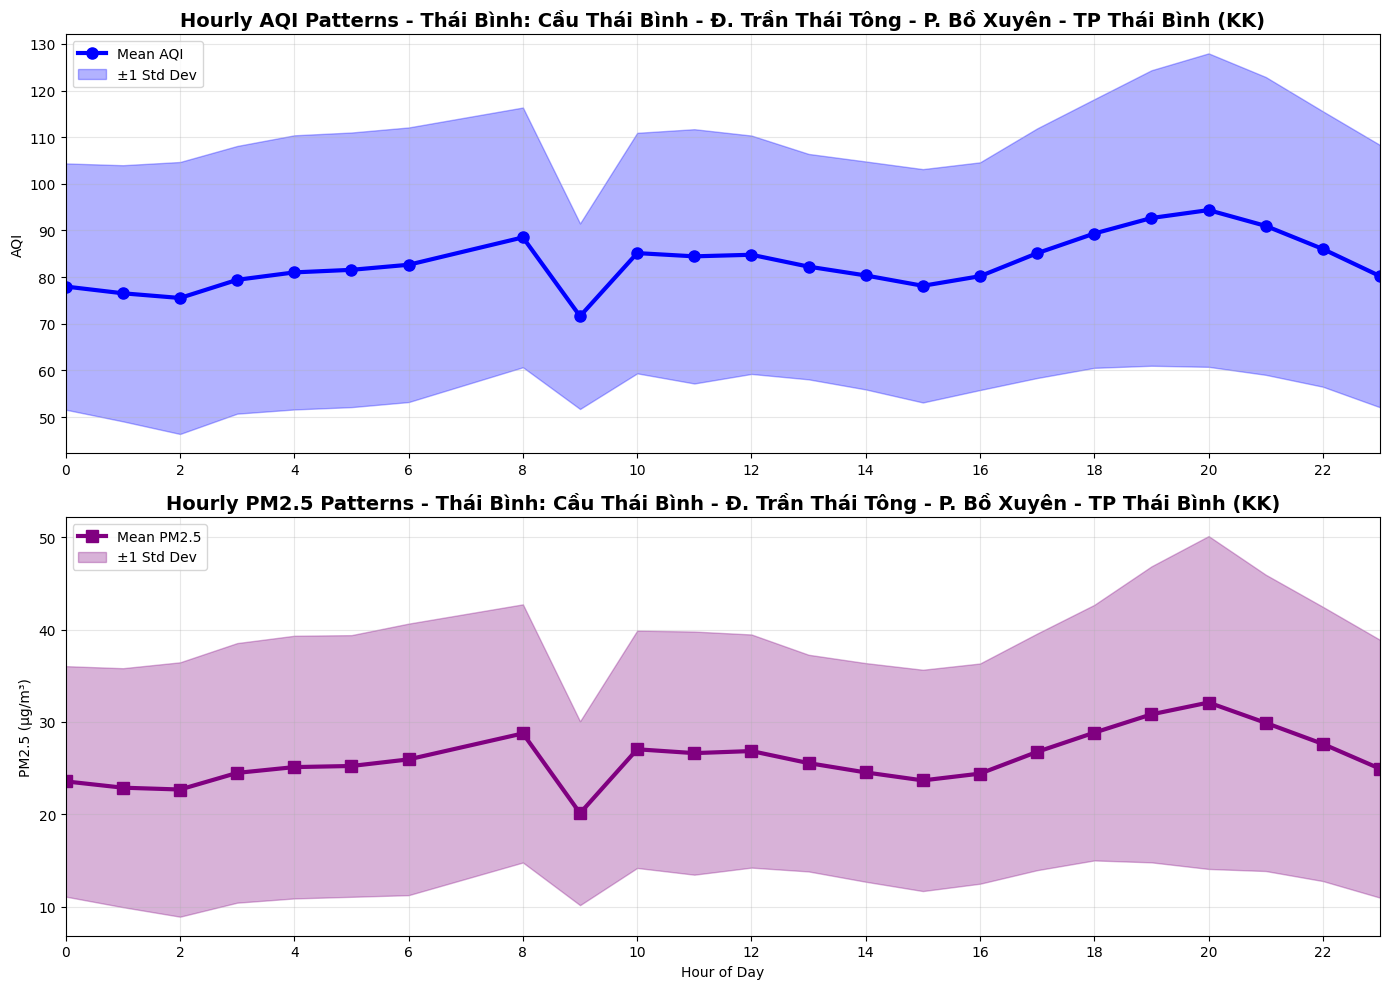

Thái nguyên: Đường Hùng Vương - Tp Thái Nguyên (KK)


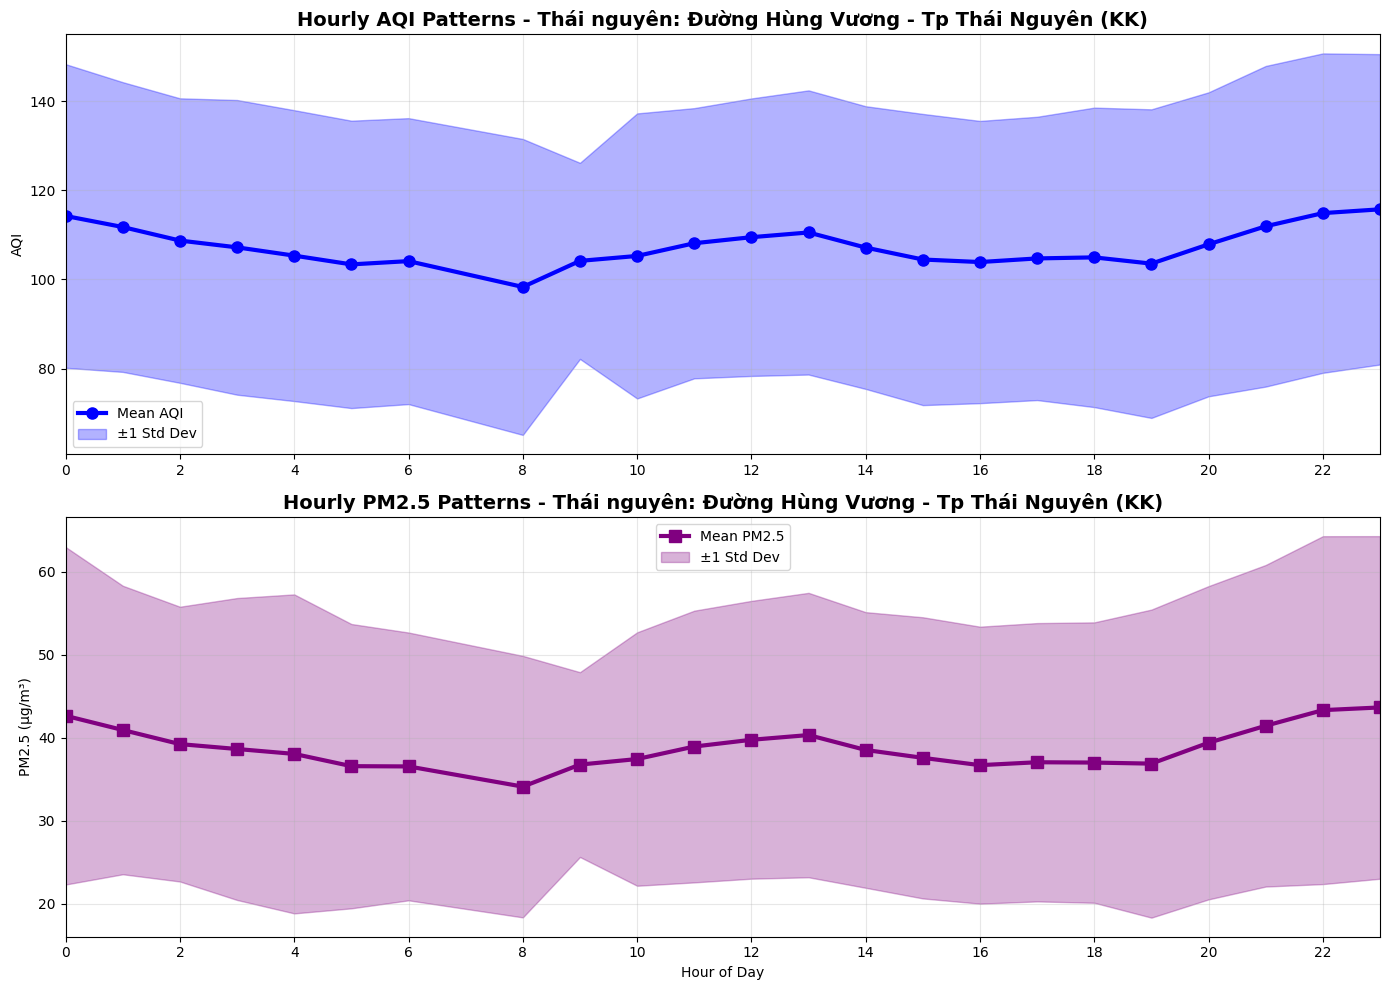

Quảng Bình: Khu kinh tế Hòn La (KK)


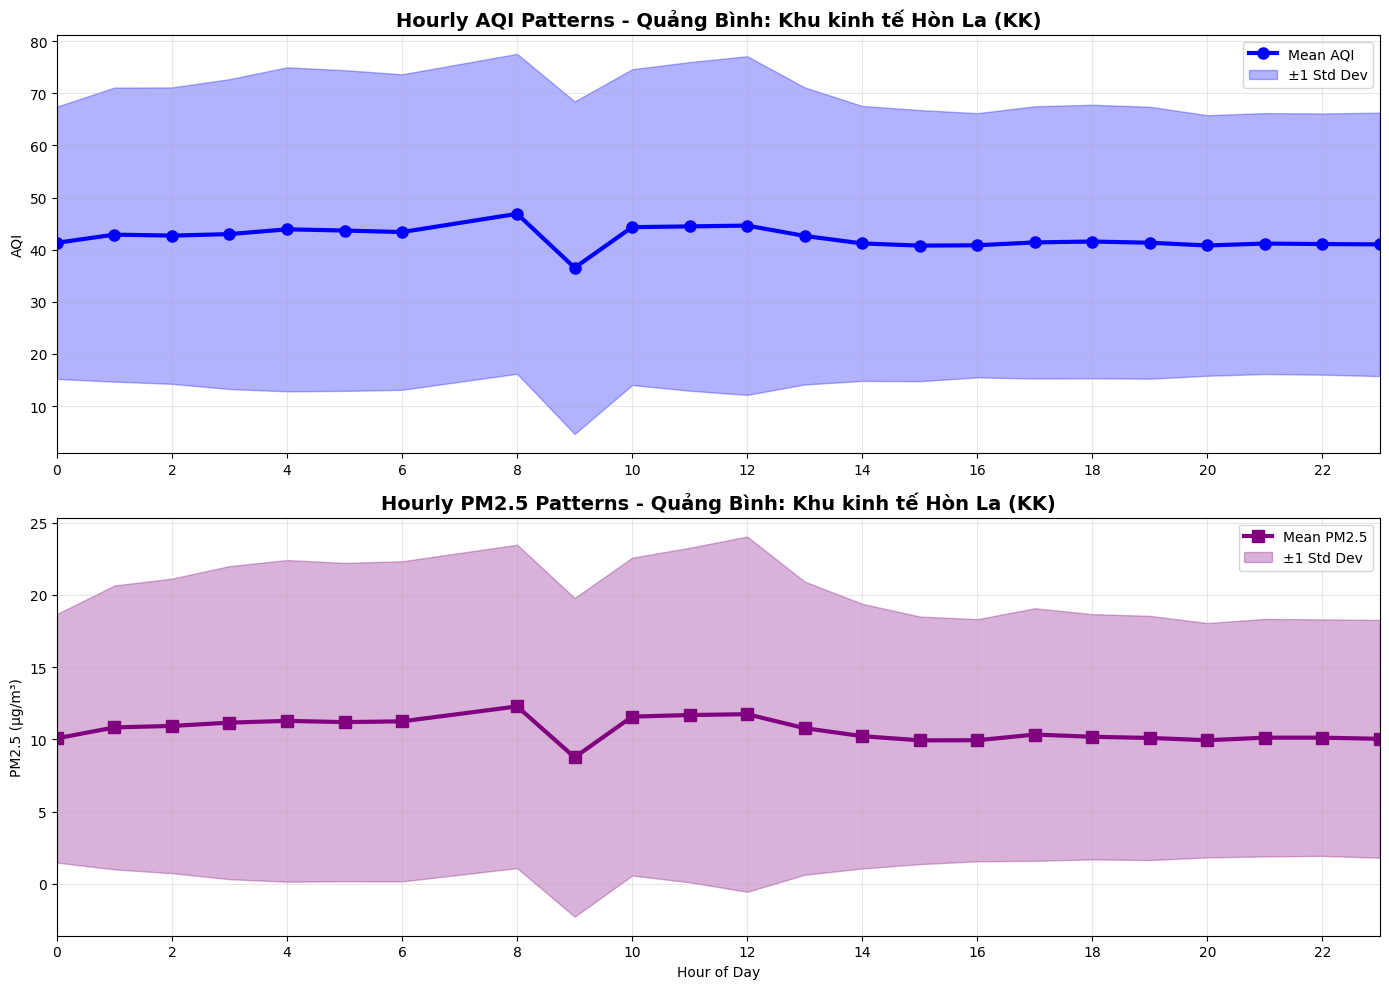

Trà Vinh: Tp. Trà Vinh (KK)


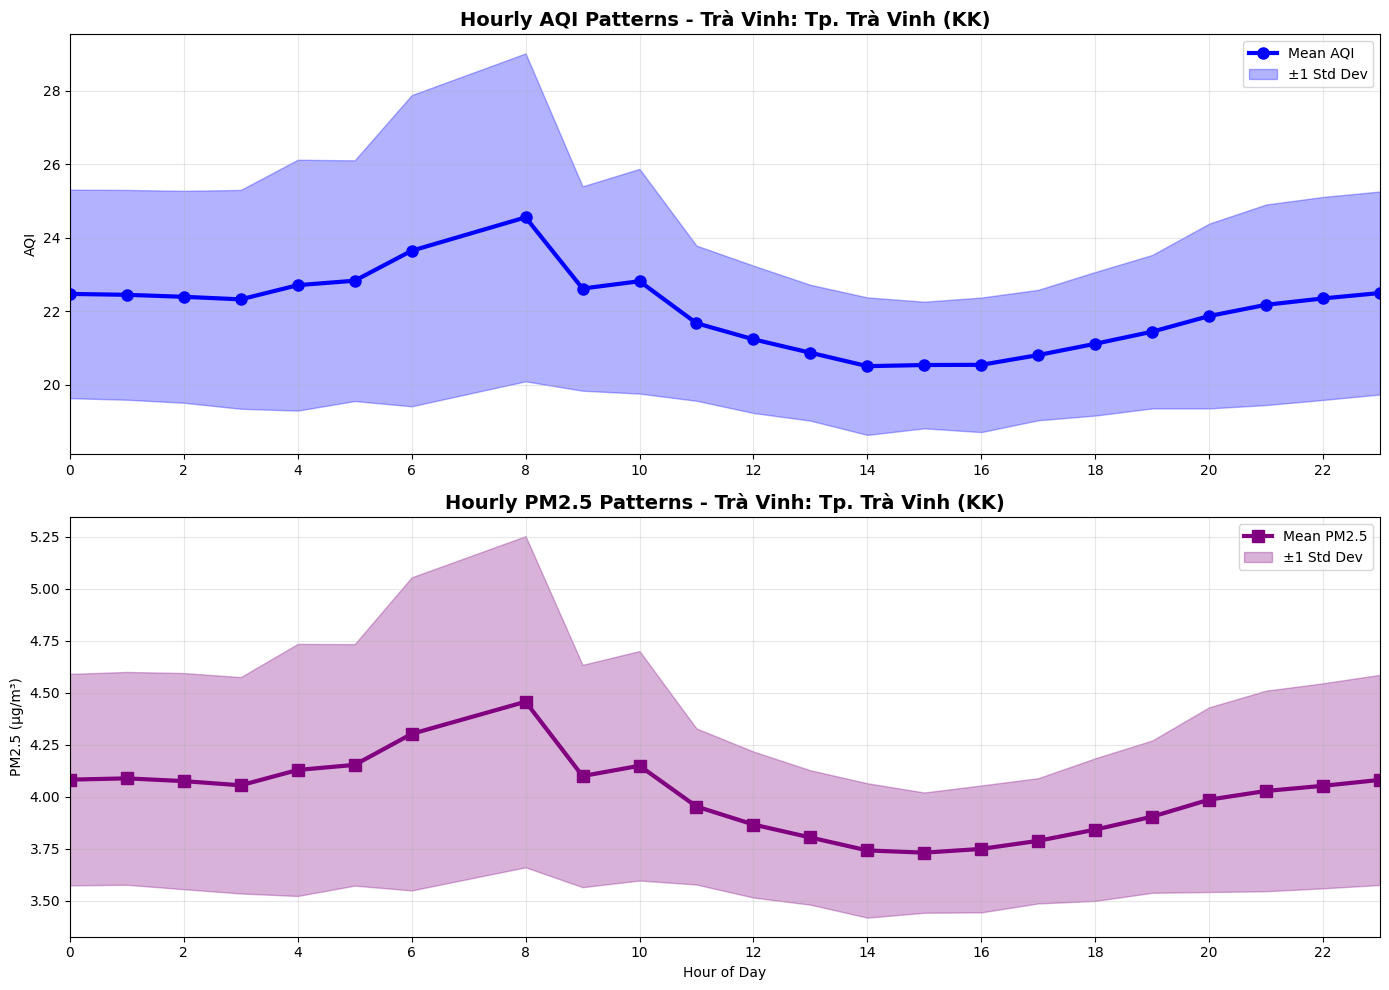

Hà Nội: Chi cục BVMT (KK)


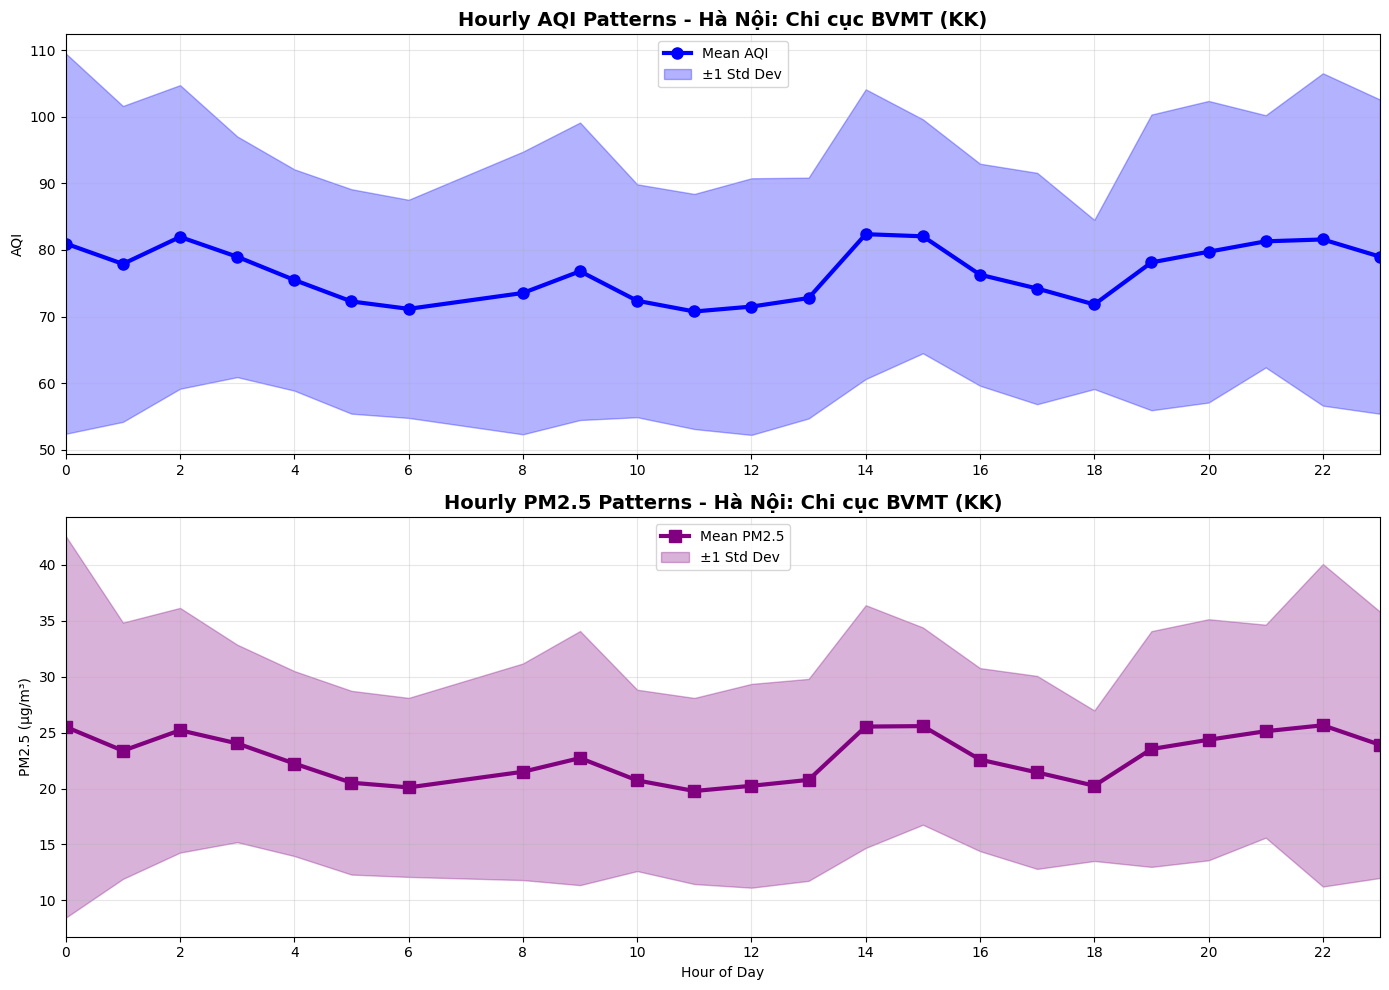

IQAir Ha Noi


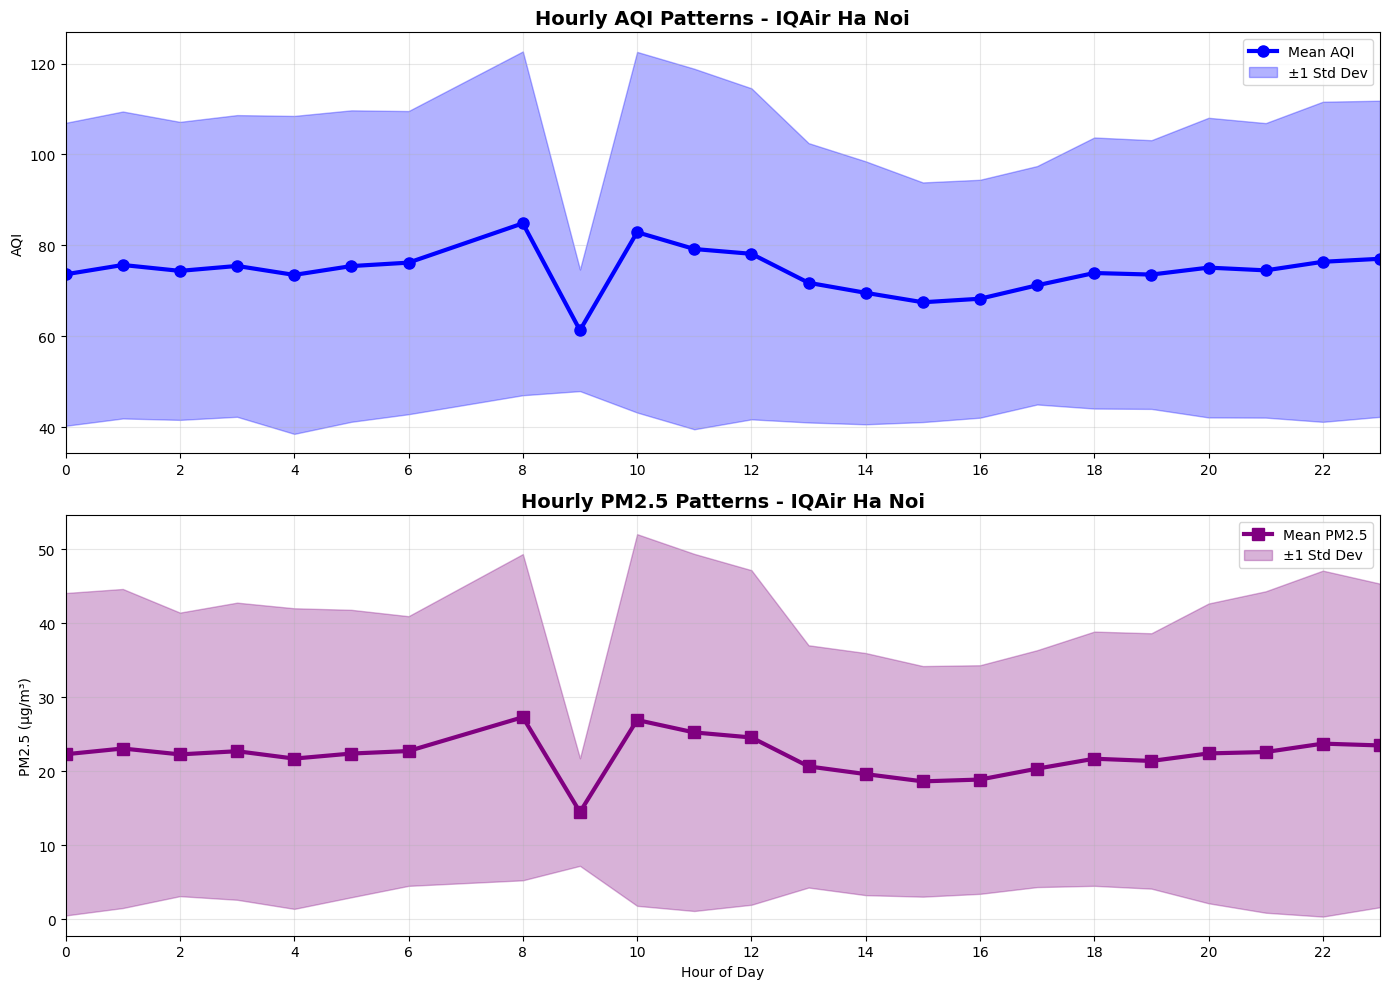

FPT


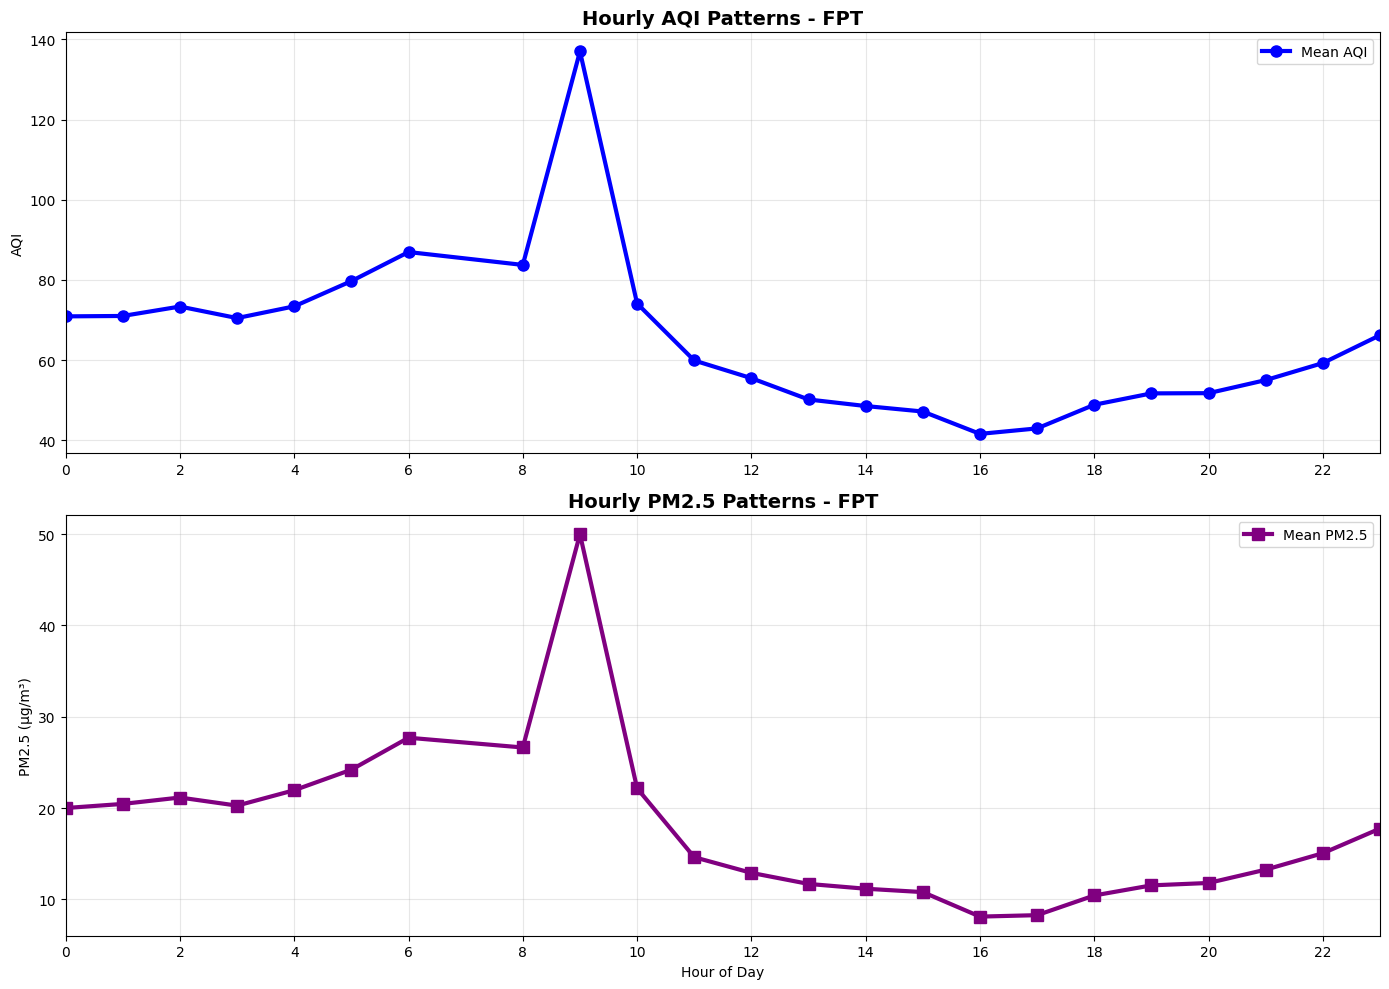

Hà Nội: TT giao lưu văn hóa phố cổ - Hoàn Kiếm - Trạm cảm biến(KK)


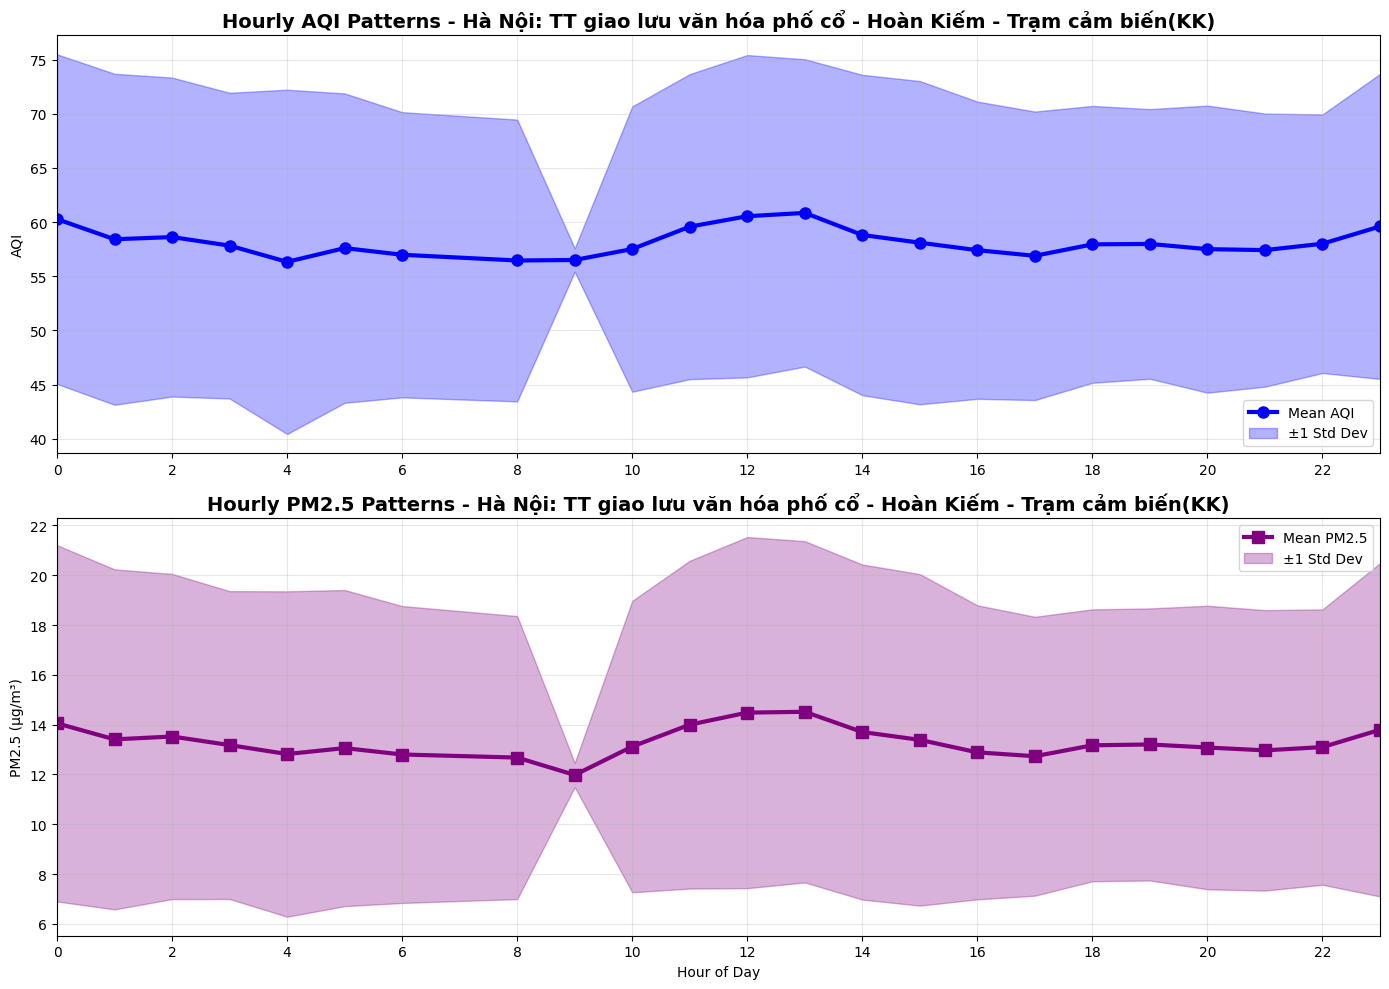

IQAir Vietnam - Saigon Pearl


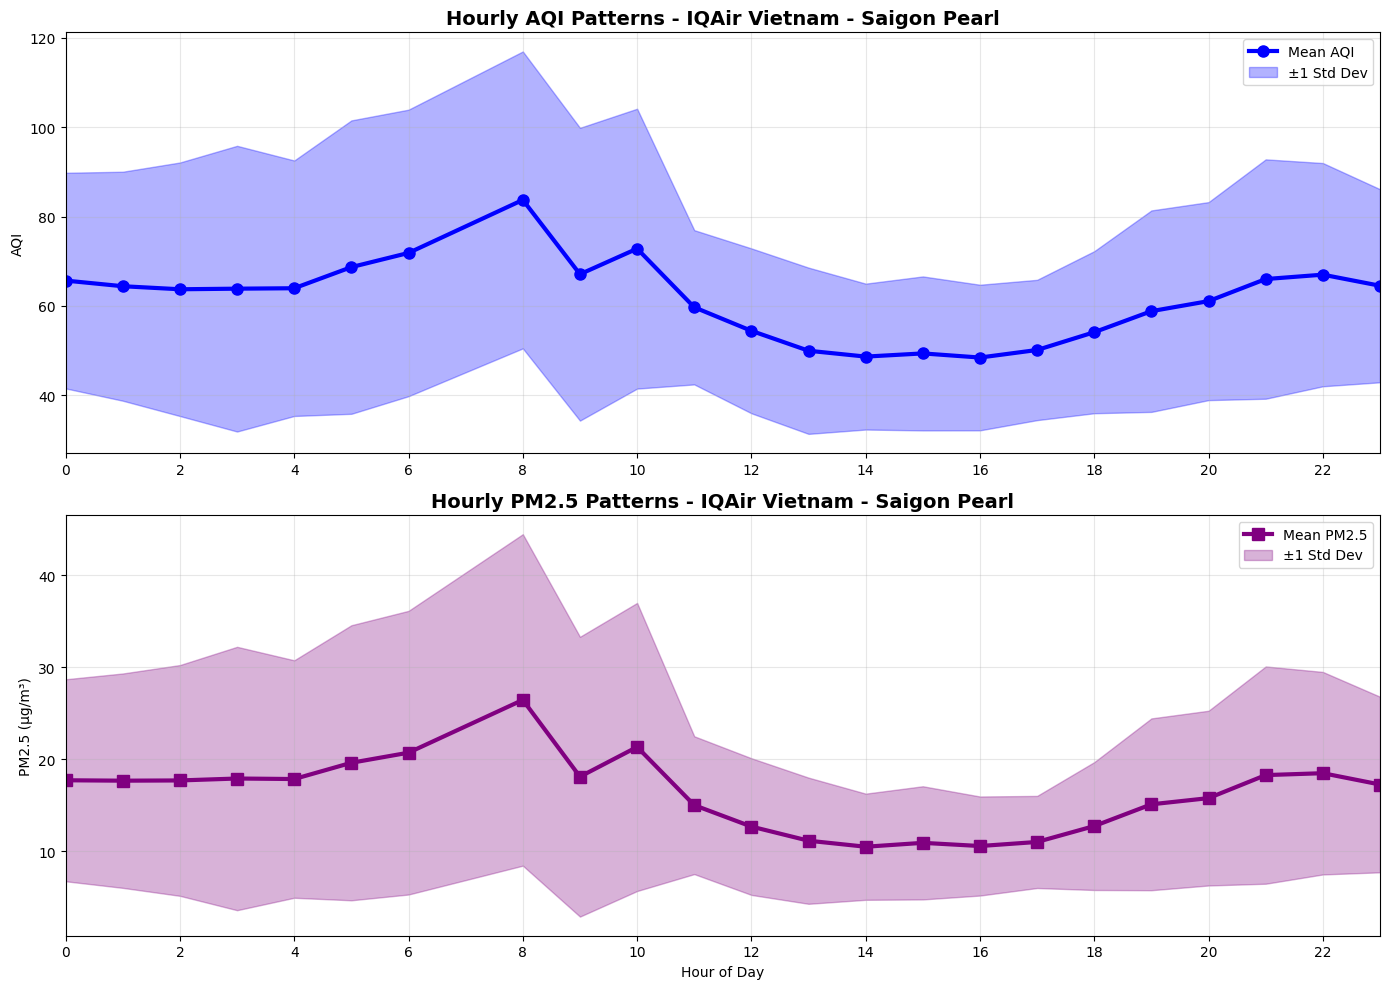

HCM - FPT Thuduc


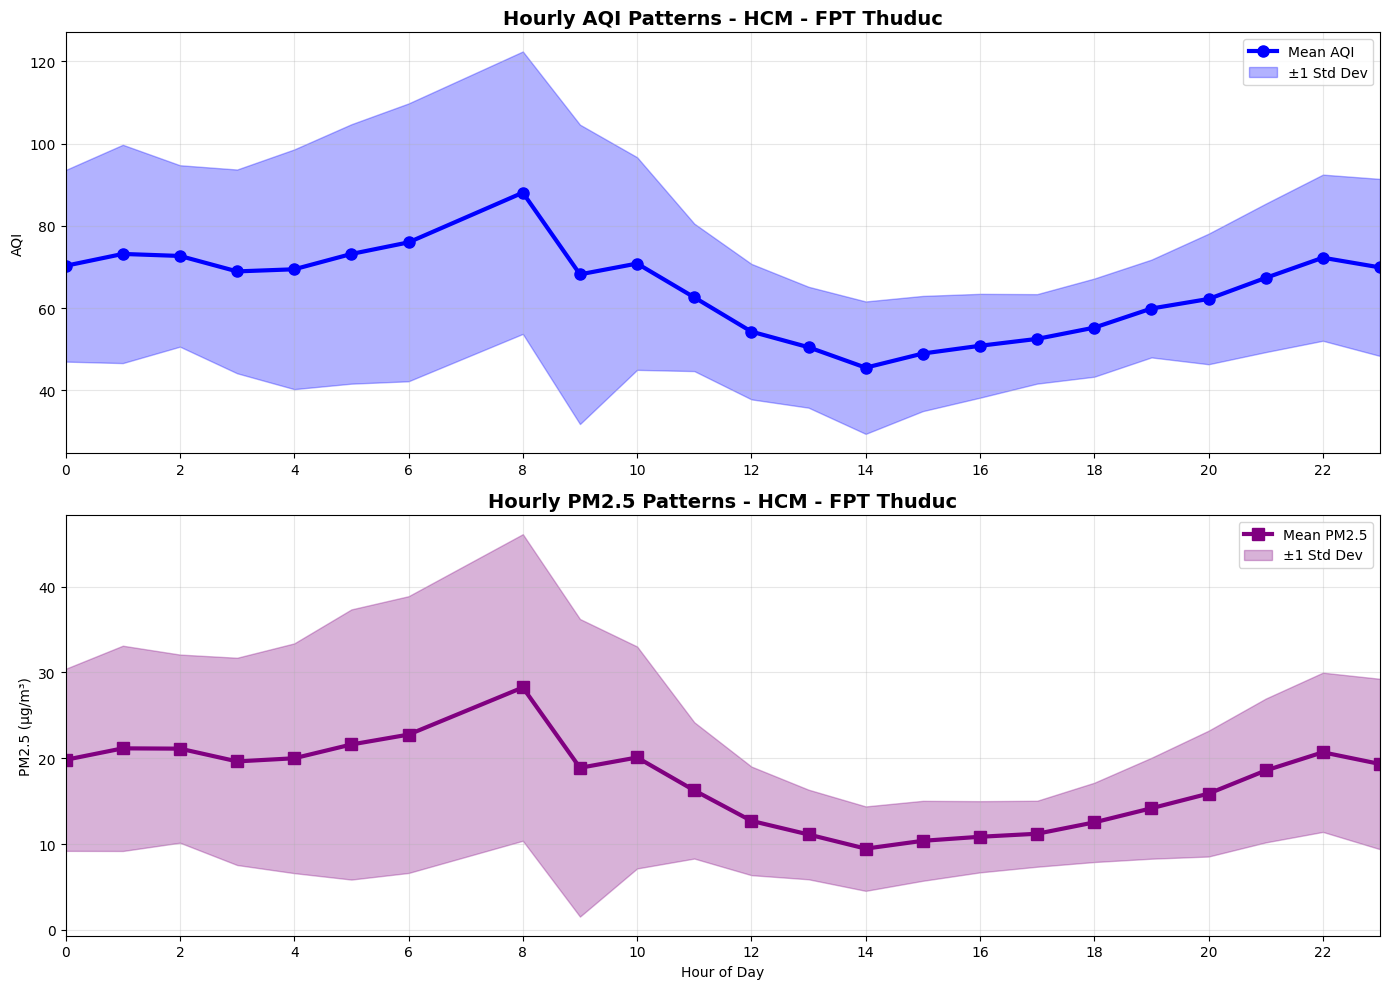

In [5]:
stations = df['station_name'].unique()

for i, station in enumerate(stations, 1):
    print(f"{station}")
    plot_individual_station_patterns(df, station)